
# *Table of Contents*

- [0. Context and Metadata](#0-context)  
- [1 Cleaning Inconsistencies](#1-cleaning)  
    -[1.1 Cleaning Brand](#1.1-brand)  
    -[1.2 Cleaning Model](#1.2-model)  
    -[1.3 Cleaning Transmission](#1.3-rest)  
    -[1.4 Cleaning Nonsense](#1.4-nonsense)  
- [2 Preprocessing](#2-preprocessing)  
    -[0.2.1 Feature Engineering](#2.1-feature)  
    -[0.2.2 Splitting Train and Test](#2.2-train)  
    -[0.2.3 Cleaning Outliers](#2.3-outliers)  
    -[0.2.4 Filling Null](#2.4-nan)    
- [3 Modelling](#3-modelling)  
- [4 Test](#4-test)  

    
        
   


# 0. Context and Metadata <a class="anchor" id="0-context"></a>
`carID`. - An attribute that contains an identifier for each car.  
`Brand`. - The car’s main brand (e.g. Ford, Toyota)  
`model` - The car model  
`year` - The year of Registration of the Car  
`mileage` - The total reported distance travelled by the car (in miles)  
`tax` - The amount of road tax (in £) that, in 2020, was applicable to the car in question.  
`fuelType` - Type of Fuel used by the car (Diesel, Petrol, Hybrid, Electric)  
`mpg` - Average Miles per Gallon  
`engineSize` - Size of Engine in liters (Cubic Decimeters)  
`paintQuality%` - The mechanic’s assessment of the cars’ overall paint quality and hull integrity (filled by the mechanic during evaluation).  
`previousOwners` - Number of previous registered owners of the vehicle.  
`hasDamage` - Boolean marker filled by the seller at the time of registration stating whether the car is damaged or not.  
`price` - The car’s price when purchased by Cars 4 You (in £).  


In [1]:
#general imports that we will need will almost always use - it is a good practice to import all libraries at the beginning of the notebook or script
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import math

# data partition
from sklearn.model_selection import train_test_split

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE


# embedded methods
from sklearn.linear_model import LassoCV

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

#set random seed for reproducibility
RSEED = 42
np.random.seed(RSEED)

In [3]:
def load_data(filepath: str): 
    """
    Load any dataset from a CSV file into a pandas DataFrame.
    
    Args:
        filepath (str): Path to the CSV file
        
    Returns:
        pd.DataFrame: Loaded dataset
    """
    df = pd.read_csv(filepath)
    return df

In [4]:
df = load_data("train.csv")
display(df.T)
df_test = load_data("test.csv")
display(df_test.T)

,0,1,2,3,4,5,6,7,8,9,...,75963,75964,75965,75966,75967,75968,75969,75970,75971,75972
carID,69512,53000,6366,29021,10062,14704,6924,50783,67071,23348,...,67221,41090,16023,60263,44131,37194,6265,54886,860,15795
Brand,VW,Toyota,Audi,Ford,BMW,BMW,Audi,Skoda,VW,Ford,...,VW,Mercedes,Ford,Opel,Mercedes,Mercedes,Audi,Toyota,Audi,Ford
model,Golf,Yaris,Q2,FIESTA,2 Series,3 Series,A3,Octavia,Passat,Focus,...,T-Roc,GLC Class,EcoSport,Crossland X,GLC Class,C Class,Q3,Aygo,Q3,Fiesta
year,2016.0,2019.0,2019.0,2018.0,2019.0,2014.0,2017.0,2017.0,2017.0,2019.0,...,2020.0,2016.0,2017.0,2018.0,2018.0,2015.0,2013.0,2017.0,2015.0,2018.0
price,22290,13790,24990,12500,22995,8199,16089,7500,15999,15300,...,25785,24486,10498,13995,30495,13498,12495,8399,12990,10495
transmission,Semi-Auto,Manual,Semi-Auto,anual,Manual,anual,Manual,Manual,Semi-Auto,Manual,...,Semi-Auto,NaN,Manual,Manual,Semi-Auto,Manual,Semi-Auto,Automatic,Manual,Manual
mileage,28421.0,4589.0,3624.0,9102.0,1000.0,101153.348285,21396.0,116750.0,30339.0,10700.0,...,10.0,22955.0,13613.0,1800.0,11943.0,14480.0,52134.0,11304.0,69072.0,16709.0
fuelType,Petrol,Petrol,Petrol,Petrol,Petrol,Diesel,Petrol,Diesel,Diesel,Petrol,...,Petrol,Diesel,Petrol,Petrol,Diesel,etrol,Diesel,Petrol,iesel,Petro
tax,NaN,145.0,145.0,145.0,145.0,30.0,20.0,145.0,150.0,150.0,...,145.0,125.0,125.0,150.0,150.0,125.0,200.0,145.0,125.0,145.0
mpg,11.417268,47.9,40.9,65.7,42.8,65.7,60.1,68.9,62.8,60.1,...,39.8,56.5,88.32164,57.7,56.5,53.3,47.9,67.0,60.1,64.2


,0,1,2,3,4,5,6,7,8,9,...,32557,32558,32559,32560,32561,32562,32563,32564,32565,32566
carID,89856,106581,80886,100174,81376,85391,82175,95250,85071,96210,...,82238,98091,87257,87937,97548,105775,81363,76833,91768,99627
Brand,Hyundai,VW,BMW,Opel,BMW,Ford,BMW,Mercedes,Ford,Skoda,...,BMW,Toyota,Ford,Ford,Skoda,VW,BMW,Audi,Mercedes,Toyota
model,I30,Tiguan,2 Series,Grandland X,1 Series,Fiesta,X1,B Class,Focus,Superb,...,i3,Prius,Fiesta,Fiesta,Octavia,Tiguan,X2,Q5,A Class,Yaris
year,2022.878006,2017.0,2016.0,2019.0,2019.0,2018.0,2016.0,2017.0,2011.0,2019.0,...,2017.0,2016.0,2017.0,2018.0,2019.0,2017.0,2020.0,2019.0,2019.0,2017.0
transmission,Automatic,Semi-Auto,Automatic,Manual,Semi-Auto,Manual,Manual,Manual,Manual,Manual,...,AUTOMATIC,Automatic,Semi-Auto,Manual,Semi-Auto,Manual,Automatic,Semi-Auto,Manual,Automatic
mileage,30700.0,-48190.655673,36792.0,5533.0,9058.0,29626.0,57717.0,14005.0,68274.0,20632.0,...,19178.0,28000.0,4512.0,10297.0,15118.0,27575.0,1980.0,8297.0,-50755.21023,11071.0
fuelType,petrol,Petrol,Petrol,Petrol,Diesel,Petrol,Diese,Diesel,Petrol,Diesel,...,Other,hybrid,Petrol,Petrol,etrol,Petrol,Petrol,Diesel,Petrol,Petrol
tax,205.0,150.0,125.0,145.0,150.0,145.0,125.0,145.0,145.0,145.0,...,0.0,0.0,0.0,150.0,150.0,145.0,145.0,145.0,145.0,30.0
mpg,41.5,38.2,51.4,44.1,51.4,65.7,58.9,65.7,47.9,64.2,...,470.8,85.6,57.7,64.2,54.3,46.3,34.0,38.2,28.5,58.0
engineSize,1.6,2.0,1.5,1.2,2.0,1.0,2.0,NaN,1.6,2.0,...,0.6,1.8,1.0,1.1,1.5,1.4,2.0,2.0,1.3,1.3


In [5]:
def get_unique_values(df):
    # Get unique values for each column as lists
    unique_values_dict = {column: df[column].unique().tolist() for column in df.columns}
    
    # Find the maximum length of unique values
    max_length = max(len(values) for values in unique_values_dict.values())
    
    # Determine padding value based on column type
    padded_dict = {}
    for column, values in unique_values_dict.items():
        # Check if column is numeric (int or float)
        if pd.api.types.is_numeric_dtype(df[column]):
            padding_value = np.nan
        else:
            padding_value = None
        # Pad the list to max_length
        padded_dict[column] = values + [padding_value] * (max_length - len(values))
    
    # Convert padded dictionary to DataFrame
    unique_df = pd.DataFrame(padded_dict)
    
    return unique_df

In [6]:
def get_unique_column_values(df, column_name):
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in DataFrame. Available columns: {list(df.columns)}")
    if pd.api.types.is_object_dtype(df[column_name]) or pd.api.types.is_string_dtype(df[column_name]):
        values = df[column_name].astype(str).str.strip().replace('nan', np.nan).unique()
    else:
        values = df[column_name].unique()
    return [x for x in values.tolist() if pd.notna(x) and x is not None]

In [7]:
display(get_unique_values(df).info())
display(get_unique_values(df_test))


# ONE CELL ONLY — does NOT affect other cells
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', None, 'display.max_colwidth', None):
    print(get_unique_column_values(df_test,"Brand"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           72 non-null     object 
 2   model           735 non-null    object 
 3   year            44 non-null     float64
 4   price           11048 non-null  float64
 5   transmission    40 non-null     object 
 6   mileage         34808 non-null  float64
 7   fuelType        34 non-null     object 
 8   tax             65 non-null     float64
 9   mpg             217 non-null    float64
 10  engineSize      58 non-null     float64
 11  paintQuality%   88 non-null     float64
 12  previousOwners  23 non-null     float64
 13  hasDamage       1 non-null      float64
dtypes: float64(9), int64(1), object(4)
memory usage: 8.1+ MB


None

,carID,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,89856,Hyundai,I30,2022.878006,Automatic,30700.000000,petrol,205.0,41.5,1.6,61.0,3.0,0.0
1,106581,VW,Tiguan,2017.000000,Semi-Auto,-48190.655673,Petrol,150.0,38.2,2.0,60.0,2.0,NaN
2,80886,BMW,2 Series,2016.000000,Manual,36792.000000,Diesel,125.0,51.4,1.5,94.0,1.0,NaN
3,100174,Opel,Grandland X,2019.000000,unknow,5533.000000,Diese,145.0,44.1,1.2,77.0,4.0,NaN
4,81376,Ford,1 Series,2018.000000,Manua,9058.000000,Hybrid,200.0,65.7,1.0,45.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32562,105775,None,None,NaN,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
32563,81363,None,None,NaN,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
32564,76833,None,None,NaN,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
32565,91768,None,None,NaN,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN


['Hyundai', 'VW', 'BMW', 'Opel', 'Ford', 'Mercedes', 'Skoda', 'Toyot', 'Toyota', 'Audi', 'For', 'Ope', 'toyota', 'vw', 'hyundai', 'MW', 'SKODA', 'ord', 'udi', 'bmw', 'V', 'BM', 'HYUNDAI', 'OPEL', 'mercedes', 'audi', 'Mercede', 'pel', 'opel', 'FORD', 'yundai', 'ford', 'Aud', 'oyota', 'MERCEDES', 'ercedes', 'AUDI', 'koda', 'Hyunda', 'W', 'skoda', 'Skod', 'ercede', 'TOYOTA', 'ERCEDES', 'kod', 'ORD', 'v', 'ud', 'M', 'FOR', 'for', 'MERCEDE', 'YUNDAI', 'PEL', 'ope', 'or', 'TOYOT', 'hyunda', 'oyot', 'UDI', 'mw', 'pe', 'bm']


# 1. Cleaning Inconsistencies <a class="anchor" id="1-cleaning"></a>

# 1.1 Cleaning Brand <a class="anchor" id="11-brand"></a>

In [8]:
def clean_categorical(dirty_data, mapping, print_unique=False):
    """
    Clean a Pandas Series or iterable of categorical data using a mapping dictionary.
    
    Args:
        dirty_data: Pandas Series or iterable containing categorical values to clean.
        mapping: Dictionary mapping incorrect variations (lowercase) to standardized values.
        print_unique: Bool, if True, prints unique cleaned values (excluding None).
    
    Returns:
        pandas.Series or list: Cleaned data with same type as input (Series if input is Series, else list).
    
    Raises:
        ValueError: If dirty_data is not iterable, mapping is not provided, not a dictionary, or empty.
    """
    import pandas as pd

    # Validate inputs
    if dirty_data is None:
        raise ValueError("dirty_data must be provided")
    if mapping is None:
        raise ValueError("mapping must be provided")
    if not isinstance(mapping, dict):
        raise ValueError("mapping must be a dictionary")
    if not mapping:
        raise ValueError("mapping cannot be empty")
    
    # Check if dirty_data is iterable (excluding strings)
    try:
        iter(dirty_data)
        if isinstance(dirty_data, str):
            raise ValueError("dirty_data cannot be a string")
    except TypeError:
        raise ValueError("dirty_data must be a Pandas Series or iterable")

    # Handle Series input
    if isinstance(dirty_data, pd.Series):
        # Filter non-None values and convert to list
        non_none_values = [str(value).strip() for value in dirty_data if pd.notna(value)]
        # Clean values: map variations to correct values, keep unmapped values unchanged
        cleaned_values = [mapping.get(value.lower(), value) for value in non_none_values]
        # Create output Series, aligning with original index
        result = pd.Series(index=dirty_data.index, dtype=object)
        idx = 0
        for i, value in dirty_data.items():
            if pd.notna(value):
                result[i] = cleaned_values[idx]
                idx += 1
            else:
                result[i] = value  # Preserve None or np.nan
        # Print unique cleaned values if requested
        if print_unique:
            unique_cleaned = sorted(set(v for v in cleaned_values if pd.notna(v)))
            print("Unique cleaned values:", unique_cleaned)
        return result
    
    # Handle list/iterable input
    cleaned_values = []
    for value in dirty_data:
        if pd.notna(value):
            cleaned_value = mapping.get(str(value).strip().lower(), str(value).strip())
            cleaned_values.append(cleaned_value)
        else:
            cleaned_values.append(value)  # Preserve None or np.nan
    # Print unique cleaned values if requested
    if print_unique:
        unique_cleaned = sorted(set(v for v in cleaned_values if pd.notna(v)))
        print("Unique cleaned values:", unique_cleaned)
    return cleaned_values

In [9]:
# Dictionary mapping variations to correct brand names
brand_mapping = {
    'vw': 'Volkswagen', 'v': 'Volkswagen', 'w': 'Volkswagen',
    'toyota': 'Toyota', 'toyot': 'Toyota', 'oyota': 'Toyota',
    'audi': 'Audi', 'aud': 'Audi', 'udi': 'Audi', 'ud': 'Audi',
    'ford': 'Ford', 'for': 'Ford', 'ord': 'Ford', 'or': 'Ford',
    'bmw': 'BMW', 'mw': 'BMW', 'bm': 'BMW',
    'skoda': 'Skoda', 'skod': 'Skoda', 'koda': 'Skoda', 'kod': 'Skoda',
    'opel': 'Opel', 'ope': 'Opel', 'pel': 'Opel', 'pe': 'Opel',
    'mercedes': 'Mercedes', 'mercede': 'Mercedes', 'ercedes': 'Mercedes', 
    'ercede': 'Mercedes',
    'hyundai': 'Hyundai', 'hyunda': 'Hyundai', 'yundai': 'Hyundai', 'yunda': 'Hyundai'
}

brand_mapping_test = {
    # === VOLKSWAGEN ===
    'vw': 'Volkswagen', 'v': 'Volkswagen', 'w': 'Volkswagen',
    
    # === TOYOTA ===
    'toyota': 'Toyota', 'toyot': 'Toyota', 'oyota': 'Toyota', 'oyot': 'Toyota', 'toyto': 'Toyota',
    
    # === AUDI ===
    'audi': 'Audi', 'aud': 'Audi', 'udi': 'Audi', 'ud': 'Audi',
    
    # === FORD ===
    'ford': 'Ford', 'for': 'Ford', 'ord': 'Ford', 'or': 'Ford',
    
    # === BMW ===
    'bmw': 'BMW', 'bm': 'BMW', 'mw': 'BMW',
    
    # === SKODA ===
    'skoda': 'Skoda', 'skod': 'Skoda', 'koda': 'Skoda', 'kod': 'Skoda',
    
    # === OPEL ===
    'opel': 'Opel', 'ope': 'Opel', 'pel': 'Opel', 'pe': 'Opel',
    
    # === MERCEDES ===
    'mercedes': 'Mercedes', 'mercede': 'Mercedes', 'ercedes': 'Mercedes', 
    'ercede': 'Mercedes', 'ercades': 'Mercedes', 'm': 'Mercedes',
    
    # === HYUNDAI ===
    'hyundai': 'Hyundai', 'hyunda': 'Hyundai', 'yundai': 'Hyundai', 'yunda': 'Hyundai'
}

df["Brand"] = clean_categorical(df["Brand"],brand_mapping)
display(get_unique_values(df).info())
display(get_unique_column_values(df, "Brand"))
df_test["Brand"] = clean_categorical(df_test["Brand"],brand_mapping_test)
display(get_unique_values(df_test).info())
display(get_unique_column_values(df_test, "Brand"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           9 non-null      object 
 2   model           735 non-null    object 
 3   year            44 non-null     float64
 4   price           11048 non-null  float64
 5   transmission    40 non-null     object 
 6   mileage         34808 non-null  float64
 7   fuelType        34 non-null     object 
 8   tax             65 non-null     float64
 9   mpg             217 non-null    float64
 10  engineSize      58 non-null     float64
 11  paintQuality%   88 non-null     float64
 12  previousOwners  23 non-null     float64
 13  hasDamage       1 non-null      float64
dtypes: float64(9), int64(1), object(4)
memory usage: 8.1+ MB


None

['Volkswagen',
 'Toyota',
 'Audi',
 'Ford',
 'BMW',
 'Skoda',
 'Opel',
 'Mercedes',
 'Hyundai']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32567 entries, 0 to 32566
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           32567 non-null  int64  
 1   Brand           9 non-null      object 
 2   model           593 non-null    object 
 3   year            44 non-null     float64
 4   transmission    38 non-null     object 
 5   mileage         20141 non-null  float64
 6   fuelType        29 non-null     object 
 7   tax             58 non-null     float64
 8   mpg             188 non-null    float64
 9   engineSize      56 non-null     float64
 10  paintQuality%   88 non-null     float64
 11  previousOwners  23 non-null     float64
 12  hasDamage       1 non-null      float64
dtypes: float64(8), int64(1), object(4)
memory usage: 3.2+ MB


None

['Hyundai',
 'Volkswagen',
 'BMW',
 'Opel',
 'Ford',
 'Mercedes',
 'Skoda',
 'Toyota',
 'Audi']

# 1.2 Cleaning Model <a class="anchor" id="12-model"></a>

In [10]:
display(get_unique_values(df).info())
display(get_unique_values(df))
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', None, 'display.max_colwidth', None):
    print(get_unique_column_values(df, "model"))
#get_unique_column_values(df, "model")
display(get_unique_values(df_test).info())
display(get_unique_values(df_test))
display(get_unique_column_values(df_test, "model"))
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', None, 'display.max_colwidth', None):
    print(get_unique_column_values(df_test, "model"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           9 non-null      object 
 2   model           735 non-null    object 
 3   year            44 non-null     float64
 4   price           11048 non-null  float64
 5   transmission    40 non-null     object 
 6   mileage         34808 non-null  float64
 7   fuelType        34 non-null     object 
 8   tax             65 non-null     float64
 9   mpg             217 non-null    float64
 10  engineSize      58 non-null     float64
 11  paintQuality%   88 non-null     float64
 12  previousOwners  23 non-null     float64
 13  hasDamage       1 non-null      float64
dtypes: float64(9), int64(1), object(4)
memory usage: 8.1+ MB


None

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,Volkswagen,Golf,2016.0,22290.0,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,Toyota,Yaris,2019.0,13790.0,Manual,4589.0,Diesel,145.0,47.900000,1.5,50.0,1.000000,NaN
2,6366,Audi,Q2,2018.0,24990.0,anual,3624.0,etrol,30.0,40.900000,1.0,56.0,-2.340306,NaN
3,29021,Ford,FIESTA,2014.0,12500.0,Semi-Aut,9102.0,Hybrid,20.0,65.700000,1.4,97.0,3.000000,NaN
4,10062,BMW,2 Series,2017.0,22995.0,Automatic,1000.0,diesel,150.0,42.800000,1.6,74.0,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75968,37194,None,None,NaN,NaN,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
75969,6265,None,None,NaN,NaN,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
75970,54886,None,None,NaN,NaN,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
75971,860,None,None,NaN,NaN,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN


['Golf', 'Yaris', 'Q2', 'FIESTA', '2 Series', '3 Series', 'A3', 'Octavia', 'Passat', 'Focus', 'Insignia', 'A Clas', 'Q3', 'Fabia', 'A Class', 'Ka+', 'GLC Class', 'I30', 'C Class', 'Polo', 'E Class', 'C Clas', 'Q5', 'Up', 'Fiesta', 'C-HR', 'Mokka X', 'Corsa', 'Astra', 'TT', '5 Series', 'Aygo', '4 Series', 'SLK', 'Viva', 'T-Roc', 'EcoSport', 'Tucson', 'EcoSpor', 'X-CLASS', 'CL Class', 'IX20', 'i20', 'Rapid', 'a1', 'Auris', 'sharan', 'I20', 'Adam', 'X3', 'A8', 'GLS Class', 'B-MAX', 'A4', 'Kona', 'I10', 'A1', 'Mokka', 'fiesta', 'S-MAX', 'X2', 'Crossland X', 'Tiguan', 'A5', 'GLE Class', 'C CLASS', 'mokka x', 'Zafira', 'Ioniq', 'A6', 'Mondeo', 'Yeti Outdoor', 'X1', 'POLO', 'INSIGNIA', 'Scala', 'S Class', '1 Series', 'Kamiq', 'Kuga', 'Tourneo Connect', 'Q7', 'GLA Class', 'Arteon', 'polo', 'SL CLASS', 'Santa Fe', 'Grandland X', 'I800', 'ASTRA', 'RAV4', 'c class', 'Touran', 'Citigo', 'Focu', 'Roomster', 'Prius', 'Corolla', 'Fiest', 'B Class', 'Sharan', 'Q', 'Kodiaq', 'V Class', 'GOLF', 'E Clas'

None

,carID,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,89856,Hyundai,I30,2022.878006,Automatic,30700.000000,petrol,205.0,41.5,1.6,61.0,3.0,0.0
1,106581,Volkswagen,Tiguan,2017.000000,Semi-Auto,-48190.655673,Petrol,150.0,38.2,2.0,60.0,2.0,NaN
2,80886,BMW,2 Series,2016.000000,Manual,36792.000000,Diesel,125.0,51.4,1.5,94.0,1.0,NaN
3,100174,Opel,Grandland X,2019.000000,unknow,5533.000000,Diese,145.0,44.1,1.2,77.0,4.0,NaN
4,81376,Ford,1 Series,2018.000000,Manua,9058.000000,Hybrid,200.0,65.7,1.0,45.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32562,105775,None,None,NaN,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
32563,81363,None,None,NaN,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
32564,76833,None,None,NaN,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
32565,91768,None,None,NaN,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN


['I30',
 'Tiguan',
 '2 Series',
 'Grandland X',
 '1 Series',
 'Fiesta',
 'X1',
 'B Class',
 'Focus',
 'Superb',
 '5 Series',
 'C Class',
 'Up',
 'Aygo',
 'Golf',
 'M CLAS',
 'Land Cruiser',
 'TT',
 'Adam',
 'Zafira',
 'E Class',
 '3 Series',
 'IX20',
 'A4',
 'Yaris',
 'Passat',
 'I10',
 'Mokka X',
 'EcoSport',
 '4 Series',
 'A7',
 'Corsa',
 'Kuga',
 'Grand C-MAX',
 'Q2',
 'M4',
 'A Class',
 'RAV4',
 'Fabia',
 'Insignia',
 'A1',
 'X6',
 'Meriva',
 'Caravelle',
 'Octavia',
 'Auris',
 'X-CLASS',
 'FOCUS',
 'Astra',
 'V Class',
 'Polo',
 'Karoq',
 'Shuttle',
 'Mokka',
 'Q5',
 'Tucson',
 'A3',
 'SL CLASS',
 'Corolla',
 'a class',
 'Ka+',
 'X3',
 'I40',
 'I20',
 'Kamiq',
 'IX35',
 'Crossland X',
 'Q3',
 'Viva',
 'GLA Class',
 'Astr',
 'CLS Class',
 'KA',
 'FABIA',
 'a3',
 'Focu',
 'Galaxy',
 'X2',
 'Kodiaq',
 'GLC Class',
 'Vivaro',
 'Mondeo',
 'Touran',
 'CL Class',
 'CORSA',
 'X5',
 'FIESTA',
 'mokka x',
 'Verso',
 'Touareg',
 'T-Roc',
 'fiesta',
 'Fiest',
 'Q',
 'A5',
 'S Class',
 'C Clas

['I30', 'Tiguan', '2 Series', 'Grandland X', '1 Series', 'Fiesta', 'X1', 'B Class', 'Focus', 'Superb', '5 Series', 'C Class', 'Up', 'Aygo', 'Golf', 'M CLAS', 'Land Cruiser', 'TT', 'Adam', 'Zafira', 'E Class', '3 Series', 'IX20', 'A4', 'Yaris', 'Passat', 'I10', 'Mokka X', 'EcoSport', '4 Series', 'A7', 'Corsa', 'Kuga', 'Grand C-MAX', 'Q2', 'M4', 'A Class', 'RAV4', 'Fabia', 'Insignia', 'A1', 'X6', 'Meriva', 'Caravelle', 'Octavia', 'Auris', 'X-CLASS', 'FOCUS', 'Astra', 'V Class', 'Polo', 'Karoq', 'Shuttle', 'Mokka', 'Q5', 'Tucson', 'A3', 'SL CLASS', 'Corolla', 'a class', 'Ka+', 'X3', 'I40', 'I20', 'Kamiq', 'IX35', 'Crossland X', 'Q3', 'Viva', 'GLA Class', 'Astr', 'CLS Class', 'KA', 'FABIA', 'a3', 'Focu', 'Galaxy', 'X2', 'Kodiaq', 'GLC Class', 'Vivaro', 'Mondeo', 'Touran', 'CL Class', 'CORSA', 'X5', 'FIESTA', 'mokka x', 'Verso', 'Touareg', 'T-Roc', 'fiesta', 'Fiest', 'Q', 'A5', 'S Class', 'C Clas', 'Scirocco', 'X7', 'B-MAX', '8 Series', 'A6', 'Santa Fe', 'GL Class', 'GLE Class', 'corsa', 'g

In [11]:
# Define known model-to-brand mapping
model_to_brand = {
    # Volkswagen
    'Golf': 'Volkswagen',
    'Polo': 'Volkswagen',
    'Passat': 'Volkswagen',
    'Tiguan': 'Volkswagen',
    'T-Roc': 'Volkswagen',
    'T-Cross': 'Volkswagen',
    'Touran': 'Volkswagen',
    'Touareg': 'Volkswagen',
    'Sharan': 'Volkswagen',
    'Scirocco': 'Volkswagen',
    'Jetta': 'Volkswagen',
    'Beetle': 'Volkswagen',
    'Arteon': 'Volkswagen',
    'Amarok': 'Volkswagen',
    'Caddy': 'Volkswagen',
    'Caddy Maxi': 'Volkswagen',
    'Caddy Maxi Life': 'Volkswagen',
    'Caddy Life': 'Volkswagen',
    'Golf Sv': 'Volkswagen',
    'Tiguan Allspace': 'Volkswagen',
    'Eos': 'Volkswagen',
    'Cc': 'Volkswagen',
    'Fox': 'Volkswagen',
    'Shuttle': 'Volkswagen',
    'California': 'Volkswagen',
    'Caravelle': 'Volkswagen',
    'Up': 'Volkswagen',

    # Toyota
    'Yaris': 'Toyota',
    'Corolla': 'Toyota',
    'Auris': 'Toyota',
    'Aygo': 'Toyota',
    'Prius': 'Toyota',
    'Rav4': 'Toyota',
    'Land Cruiser': 'Toyota',
    'GT86': 'Toyota',
    'Supra': 'Toyota',
    'C-Hr': 'Toyota',
    'C-HR': 'Toyota',
    'Avensis': 'Toyota',
    'Verso': 'Toyota',
    'Verso-S': 'Toyota',
    'Camry': 'Toyota',
    'Hilux': 'Toyota',
    'Proace Verso': 'Toyota',
    'Urban Cruiser': 'Toyota',
    'IQ': 'Toyota',

    # Audi
    'A1': 'Audi',
    'A2': 'Audi',
    'A3': 'Audi',
    'A4': 'Audi',
    'A5': 'Audi',
    'A6': 'Audi',
    'A7': 'Audi',
    'A8': 'Audi',
    'Q2': 'Audi',
    'Q3': 'Audi',
    'Q5': 'Audi',
    'Q7': 'Audi',
    'Q8': 'Audi',
    'TT': 'Audi',
    'S3': 'Audi',
    'S4': 'Audi',
    'S5': 'Audi',
    'S8': 'Audi',
    'RS3': 'Audi',
    'RS4': 'Audi',
    'RS5': 'Audi',
    'RS6': 'Audi',
    'SQ5': 'Audi',
    'SQ7': 'Audi',
    'R8': 'Audi',

    # Ford
    'Fiesta': 'Ford',
    'Focus': 'Ford',
    'Kuga': 'Ford',
    'Mondeo': 'Ford',
    'EcoSport': 'Ford',
    'S-Max': 'Ford',
    'B-Max': 'Ford',
    'C-Max': 'Ford',
    'Grand C-Max': 'Ford',
    'Ka': 'Ford',
    'Ka+': 'Ford',
    'Mustang': 'Ford',
    'Edge': 'Ford',
    'Puma': 'Ford',
    'Ranger': 'Ford',
    'Escort': 'Ford',
    'Fusion': 'Ford',
    'Streetka': 'Ford',
    'Galaxy': 'Ford',
    'Tourneo Connect': 'Ford',
    'Tourneo Custom': 'Ford',
    'Grand Tourneo Connect': 'Ford',

    # BMW
    '1 Series': 'BMW',
    '2 Series': 'BMW',
    '3 Series': 'BMW',
    '4 Series': 'BMW',
    '5 Series': 'BMW',
    '6 Series': 'BMW',
    '7 Series': 'BMW',
    '8 Series': 'BMW',
    'X1': 'BMW',
    'X2': 'BMW',
    'X3': 'BMW',
    'X4': 'BMW',
    'X5': 'BMW',
    'X6': 'BMW',
    'X7': 'BMW',
    'Z3': 'BMW',
    'Z4': 'BMW',
    'M2': 'BMW',
    'M3': 'BMW',
    'M4': 'BMW',
    'M5': 'BMW',
    'M6': 'BMW',
    'I3': 'BMW',
    'I8': 'BMW',

    # Skoda
    'Octavia': 'Skoda',
    'Fabia': 'Skoda',
    'Rapid': 'Skoda',
    'Yeti': 'Skoda',
    'Yeti Outdoor': 'Skoda',
    'Superb': 'Skoda',
    'Scala': 'Skoda',
    'Kamiq': 'Skoda',
    'Kodiaq': 'Skoda',
    'Citigo': 'Skoda',
    'Roomster': 'Skoda',
    'Karoq': 'Skoda',

    # Opel / Vauxhall
    'Corsa': 'Opel',
    'Astra': 'Opel',
    'Insignia': 'Opel',
    'Mokka': 'Opel',
    'Mokka X': 'Opel',
    'Zafira': 'Opel',
    'Zafira Tourer': 'Opel',
    'Meriva': 'Opel',
    'Adam': 'Opel',
    'Crossland': 'Opel',
    'Crossland X': 'Opel',
    'Grandland': 'Opel',
    'Grandland X': 'Opel',
    'Viva': 'Opel',
    'Combo Life': 'Opel',
    'Antara': 'Opel',
    'Agila': 'Opel',
    'Ampera': 'Opel',
    'Cascada': 'Opel',
    'Vectra': 'Opel',
    'Gtc': 'Opel',
    'Tigra': 'Opel',
    'Vivaro': 'Opel',

    # Mercedes-Benz
    'A Class': 'Mercedes',
    'B Class': 'Mercedes',
    'C Class': 'Mercedes',
    'E Class': 'Mercedes',
    'S Class': 'Mercedes',
    'G Class': 'Mercedes',
    'Gla Class': 'Mercedes',
    'Glb Class': 'Mercedes',
    'Glc Class': 'Mercedes',
    'Gle Class': 'Mercedes',
    'Gls Class': 'Mercedes',
    'Sl Class': 'Mercedes',
    'Slk': 'Mercedes',
    'Clk': 'Mercedes',
    'Cls Class': 'Mercedes',
    'Cl Class': 'Mercedes',
    'Clc Class': 'Mercedes',
    'M Class': 'Mercedes',
    'X-Class': 'Mercedes',
    'V Class': 'Mercedes',
    'Cla Class': 'Mercedes',
    'Gl Class': 'Mercedes',

    # Hyundai
    'Tucson': 'Hyundai',
    'Santa Fe': 'Hyundai',
    'I10': 'Hyundai',
    'I20': 'Hyundai',
    'I30': 'Hyundai',
    'I40': 'Hyundai',
    'Ix20': 'Hyundai',
    'Ix35': 'Hyundai',
    'Kona': 'Hyundai',
    'Ioniq': 'Hyundai',
    'I800': 'Hyundai',
    'Getz': 'Hyundai',
    'Accent': 'Hyundai',
    'Terracan': 'Hyundai',
    'Veloster': 'Hyundai'
}

model_to_brand_test = {
    # Volkswagen
    'Golf': 'Volkswagen', 'Polo': 'Volkswagen', 'Passat': 'Volkswagen', 'Tiguan': 'Volkswagen',
    'T-Roc': 'Volkswagen', 'T-Cross': 'Volkswagen', 'Touran': 'Volkswagen', 'Touareg': 'Volkswagen',
    'Sharan': 'Volkswagen', 'Scirocco': 'Volkswagen', 'Jetta': 'Volkswagen', 'Beetle': 'Volkswagen',
    'Arteon': 'Volkswagen', 'Amarok': 'Volkswagen', 'Caddy': 'Volkswagen', 'Caddy Maxi': 'Volkswagen',
    'Caddy Maxi Life': 'Volkswagen', 'Caddy Life': 'Volkswagen', 'Golf SV': 'Volkswagen',
    'Tiguan Allspace': 'Volkswagen', 'Eos': 'Volkswagen', 'CC': 'Volkswagen', 'Fox': 'Volkswagen',
    'Shuttle': 'Volkswagen', 'California': 'Volkswagen', 'Caravelle': 'Volkswagen', 'Up': 'Volkswagen',

    # Toyota
    'Yaris': 'Toyota', 'Corolla': 'Toyota', 'Auris': 'Toyota', 'Aygo': 'Toyota', 'Prius': 'Toyota',
    'RAV4': 'Toyota', 'Land Cruiser': 'Toyota', 'GT86': 'Toyota', 'Supra': 'Toyota', 'C-HR': 'Toyota',
    'Avensis': 'Toyota', 'Verso': 'Toyota', 'Camry': 'Toyota', 'Hilux': 'Toyota', 'Proace Verso': 'Toyota',
    'IQ': 'Toyota',

    # Audi
    'A1': 'Audi', 'A3': 'Audi', 'A4': 'Audi', 'A5': 'Audi', 'A6': 'Audi', 'A7': 'Audi', 'A8': 'Audi',
    'Q2': 'Audi', 'Q3': 'Audi', 'Q5': 'Audi', 'Q7': 'Audi', 'Q8': 'Audi', 'TT': 'Audi',
    'S3': 'Audi', 'S4': 'Audi', 'S5': 'Audi', 'RS3': 'Audi', 'RS4': 'Audi', 'RS5': 'Audi',
    'RS6': 'Audi', 'RS7': 'Audi', 'SQ5': 'Audi', 'SQ7': 'Audi', 'R8': 'Audi',

    # Ford
    'Fiesta': 'Ford', 'Focus': 'Ford', 'Kuga': 'Ford', 'Mondeo': 'Ford', 'EcoSport': 'Ford',
    'S-MAX': 'Ford', 'B-MAX': 'Ford', 'C-MAX': 'Ford', 'Grand C-MAX': 'Ford', 'Ka': 'Ford',
    'Ka+': 'Ford', 'Mustang': 'Ford', 'Edge': 'Ford', 'Puma': 'Ford', 'Galaxy': 'Ford',
    'Tourneo Connect': 'Ford', 'Tourneo Custom': 'Ford', 'Grand Tourneo Connect': 'Ford',

    # BMW
    '1 Series': 'BMW', '2 Series': 'BMW', '3 Series': 'BMW', '4 Series': 'BMW', '5 Series': 'BMW',
    '6 Series': 'BMW', '7 Series': 'BMW', '8 Series': 'BMW', 'X1': 'BMW', 'X2': 'BMW', 'X3': 'BMW',
    'X4': 'BMW', 'X5': 'BMW', 'X6': 'BMW', 'X7': 'BMW', 'Z3': 'BMW', 'Z4': 'BMW',
    'M2': 'BMW', 'M3': 'BMW', 'M4': 'BMW', 'M5': 'BMW', 'M6': 'BMW', 'I3': 'BMW', 'I8': 'BMW',

    # Skoda
    'Octavia': 'Skoda', 'Fabia': 'Skoda', 'Rapid': 'Skoda', 'Yeti': 'Skoda', 'Yeti Outdoor': 'Skoda',
    'Superb': 'Skoda', 'Scala': 'Skoda', 'Kamiq': 'Skoda', 'Kodiaq': 'Skoda', 'Citigo': 'Skoda',
    'Roomster': 'Skoda', 'Karoq': 'Skoda',

    # Opel
    'Corsa': 'Opel', 'Astra': 'Opel', 'Insignia': 'Opel', 'Mokka': 'Opel', 'Mokka X': 'Opel',
    'Zafira': 'Opel', 'Zafira Tourer': 'Opel', 'Meriva': 'Opel', 'Adam': 'Opel', 'Crossland': 'Opel',
    'Crossland X': 'Opel', 'Grandland': 'Opel', 'Grandland X': 'Opel', 'Viva': 'Opel',
    'Combo Life': 'Opel', 'Antara': 'Opel', 'Agila': 'Opel', 'Ampera': 'Opel', 'Cascada': 'Opel',
    'GTC': 'Opel', 'Tigra': 'Opel', 'Vivaro': 'Opel',

    # Mercedes
    'A Class': 'Mercedes', 'B Class': 'Mercedes', 'C Class': 'Mercedes', 'E Class': 'Mercedes',
    'S Class': 'Mercedes', 'G Class': 'Mercedes', 'GLA Class': 'Mercedes', 'GLB Class': 'Mercedes',
    'GLC Class': 'Mercedes', 'GLE Class': 'Mercedes', 'GLS Class': 'Mercedes', 'SL Class': 'Mercedes',
    'SLK': 'Mercedes', 'CLK': 'Mercedes', 'CLS Class': 'Mercedes', 'CL Class': 'Mercedes',
    'CLC Class': 'Mercedes', 'M Class': 'Mercedes', 'X-CLASS': 'Mercedes', 'V Class': 'Mercedes',
    'CLA Class': 'Mercedes', 'GL Class': 'Mercedes',

    # Hyundai
    'Tucson': 'Hyundai', 'Santa Fe': 'Hyundai', 'I10': 'Hyundai', 'I20': 'Hyundai', 'I30': 'Hyundai',
    'I40': 'Hyundai', 'IX20': 'Hyundai', 'IX35': 'Hyundai', 'Kona': 'Hyundai', 'Ioniq': 'Hyundai',
    'I800': 'Hyundai', 'Terracan': 'Hyundai', 'Veloster': 'Hyundai'
}

misspelling_model_corrections = {
    # Ford
    'fiesta': 'Fiesta',
    'fiest': 'Fiesta',
    'focu': 'Focus',
    'kug': 'Kuga',
    'monde': 'Mondeo',
    'ecospor': 'EcoSport',
    'b-ma': 'B-Max',
    'b max': 'B-Max',
    's-ma': 'S-Max',
    's max': 'S-Max',
    'c-ma': 'C-Max',
    'c max': 'C-Max',
    'grand c-ma': 'Grand C-Max',
    'grand c max': 'Grand C-Max',
    'grand tourneo connec': 'Grand Tourneo Connect',
    'tourneo custo': 'Tourneo Custom',
    'galax': 'Galaxy',
    'edg': 'Edge',
    'puma': 'Puma',
    'streetka': 'StreetKa',

    # Volkswagen
    'gol': 'Golf',
    'golf': 'Golf',
    'polo': 'Polo',
    'passa': 'Passat',
    'passat': 'Passat',
    't-ro':'T-Roc',
    't roc': 'T-Roc',
    'troc': 'T-Roc',
    't-roc': 'T-Roc',
    't ro': 'T-Roc',
    't rock': 'T-Roc',
    't cross': 'T-Cross',
    'tcross': 'T-Cross',
    't-cros': 'T-Cross',  # Added
    't cro': 'T-Cross',
    'tiguan allspac': 'Tiguan Allspace',
    'tiguan allspace': 'Tiguan Allspace',
    'tigua': 'Tiguan',
    'touare': 'Touareg',
    'toura': 'Touran',
    'touran': 'Touran',
    'shara': 'Sharan',
    'scirocc': 'Scirocco',
    'arteo': 'Arteon',
    'beetl': 'Beetle',
    'caravell': 'Caravelle',
    'caddy maxi lif': 'Caddy Maxi Life',
    'caddy maxi life': 'Caddy Maxi Life',
    'shuttle': 'Sharan',
    't': 'Up',
    'up': 'Up',
    'amaro': 'Amarok',  # Added
    'pol': 'Polo',      # Added

    # Toyota
    'yaris': 'Yaris',
    'yari': 'Yaris',
    'auris': 'Auris',
    'auri': 'Auris',
    'ayg': 'Aygo',
    'aygo': 'Aygo',
    'coroll': 'Corolla',
    'c-hr': 'C-HR',
    'c hr': 'C-HR',
    'c h': 'C-HR',
    'rav': 'RAV4',
    'land cruise': 'Land Cruiser',
    'urban cruise': 'Urban Cruiser',
    'hilu': 'Hilux',
    'vers': 'Verso',
    'verso s': 'Verso-S',
    'iq': 'IQ',

    # Opel / Vauxhall
    'astra': 'Astra',
    'astr': 'Astra',
    'corsa': 'Corsa',
    'cors': 'Corsa',
    'insignia': 'Insignia',
    'insigni': 'Insignia',
    'mokka': 'Mokka',
    'mokk': 'Mokka',
    'mokka x': 'Mokka X',
    'meriv': 'Meriva',
    'zafir': 'Zafira',
    'zafira toure': 'Zafira Tourer',
    'ada': 'Adam',
    'crossland x': 'Crossland X',
    'grandland x': 'Grandland X',
    'grandland': 'Grandland X',
    'viva': 'Viva',
    'combo lif': 'Combo Life',
    'gtc': 'GTC',
    'antara': 'Antara',
    'cascad': 'Cascada',
    'vivar': 'Vivaro',
    'viv': 'Vivaro',

    # Skoda
    'fabia': 'Fabia',
    'fabi': 'Fabia',
    'octavia': 'Octavia',
    'octavi': 'Octavia',
    'kodia': 'Kodiaq',
    'karo': 'Karoq',
    'karoq': 'Karoq',
    'kami': 'Kamiq',
    'kamiq': 'Kamiq',
    'citig': 'Citigo',
    'citigo': 'Citigo',
    'rapid': 'Rapid',
    'rapi': 'Rapid',
    'yeti outdoo': 'Yeti Outdoor',
    'yeti': 'Yeti',
    'yet': 'Yeti',
    'super': 'Superb',
    'scal': 'Scala',
    'roomste': 'Roomster',

    # Mercedes-Benz
    'a clas': 'A Class',
    'a class': 'A Class',
    'b clas': 'B Class',
    'b class': 'B Class',
    'c clas': 'C Class',
    'c class': 'C Class',
    'e clas': 'E Class',
    'e class': 'E Class',
    's clas': 'S Class',
    's class': 'S Class',
    'glc clas': 'GLC Class',
    'glc class': 'GLC Class',
    'gle clas': 'GLE Class',
    'gle class': 'GLE Class',
    'gls clas': 'GLS Class',
    'gls class': 'GLS Class',
    'cl clas': 'CL Class',
    'cl class': 'CL Class',
    'cla class': 'CLA Class',
    'cls clas': 'CLS Class',
    'cls class': 'CLS Class',
    'gl clas': 'GL Class',
    'gl class': 'GL Class',
    'glb clas': 'GLB Class',
    'glb class': 'GLB Class',
    'gla clas': 'GLA Class',
    'gla class': 'GLA Class',
    'm class': 'M Class',
    'm clas': 'M Class',
    'x-clas':'X-Class',
    'x-class': 'X-Class',
    'x class': 'X-Class',
    'x clas': 'X-Class',
    'v clas': 'V Class',
    'v class': 'V Class',
    'sl':'SL Class',
    'sl clas': 'SL Class',
    'sl class': 'SL Class',
    'slk': 'SLK',
    'clk': 'CLK',

    # Audi
    'a1': 'A1',
    'a2': 'A2',
    'a3': 'A3',
    'a4': 'A4',
    'a5': 'A5',
    'a6': 'A6',
    'a7': 'A7',
    'a8': 'A8',
    'q2': 'Q2',
    'q3': 'Q3',
    'q5': 'Q5',
    'q7': 'Q7',
    'q8': 'Q8',
    'tt': 'TT',
    's3': 'S3',
    's4': 'S4',
    's5': 'S5',
    'rs3': 'RS3',
    'rs4': 'RS4',
    'rs5': 'RS5',
    'rs6': 'RS6',
    'sq5': 'SQ5',
    'sq7': 'SQ7',
    'r8': 'R8',

    # BMW
    '1 series': '1 Series',
    '2 series': '2 Series',
    '3 series': '3 Series',
    '4 series': '4 Series',
    '5 series': '5 Series',
    '6 series': '6 Series',
    '7 series': '7 Series',
    '8 series': '8 Series',
    'x1': 'X1',
    'x2': 'X2',
    'x3': 'X3',
    'x4': 'X4',
    'x5': 'X5',
    'x6': 'X6',
    'x7': 'X7',
    'z3': 'Z3',
    'z4': 'Z4',
    'm2': 'M2',
    'm3': 'M3',
    'm4': 'M4',
    'm5': 'M5',
    'm6': 'M6',
    'i3': 'I3',
    'i8': 'I8',
    'ix2': 'IX20',
    'i': 'I10',
    'i10': 'I10',
    '1 serie': '1 Series',
    '2 serie': '2 Series',
    '3 serie': '3 Series',
    '4 serie': '4 Series',
    '5 serie': '5 Series',
    '6 serie': '6 Series',
    '7 serie': '7 Series',
    '8 serie': '8 Series',

    # Hyundai
    'tucso': 'Tucson',
    'tucson': 'Tucson',
    'santa f': 'Santa Fe',
    'i1': 'I10',
    'i2': 'I20',
    'i20': 'I20',
    'i30': 'I30',
    'i40': 'I40',
    'ix20': 'IX20',
    'ix35': 'IX35',
    'ioni': 'Ioniq',
    'i80': 'I800',
    'getz': 'Getz',
    'accent': 'Accent',
    'terracan': 'Terracan',
    'kon': 'Kona',    # Added
    'kona': 'Kona',   # Added
    'veloste': 'Veloster',  # Added
}

misspelling_model_corrections_test = {
    # Ford
    'fiesta': 'Fiesta', 'fiest': 'Fiesta', 'focu': 'Focus', 'kug': 'Kuga', 'monde': 'Mondeo',
    'ecospor': 'EcoSport', 'b-ma': 'B-MAX', 's-ma': 'S-MAX', 'c-ma': 'C-MAX',
    'grand c-ma': 'Grand C-MAX', 'grand tourneo connec': 'Grand Tourneo Connect',
    'tourneo custo': 'Tourneo Custom', 'galax': 'Galaxy', 'edg': 'Edge', 'pum': 'Puma',

    # Volkswagen
    'gol': 'Golf', 'golf': 'Golf', 'polo': 'Polo', 'passa': 'Passat', 't-ro': 'T-Roc',
    't-roc': 'T-Roc', 't cro': 'T-Cross', 'tiguan allspac': 'Tiguan Allspace',
    'tigua': 'Tiguan', 'touare': 'Touareg', 'toura': 'Touran', 'shara': 'Sharan',
    'scirocc': 'Scirocco', 'arteo': 'Arteon', 'caravell': 'Caravelle',
    'caddy maxi lif': 'Caddy Maxi Life', 't': 'Up', 'pol': 'Polo', 'amaro': 'Amarok',

    # Toyota
    'yaris': 'Yaris', 'yari': 'Yaris', 'auri': 'Auris', 'ayg': 'Aygo', 'coroll': 'Corolla',
    'c-hr': 'C-HR', 'c-h': 'C-HR', 'rav': 'RAV4', 'hilu': 'Hilux', 'vers': 'Verso',

    # Opel
    'astra': 'Astra', 'astr': 'Astra', 'corsa': 'Corsa', 'cors': 'Corsa', 'insigni': 'Insignia',
    'mokk': 'Mokka', 'meriv': 'Meriva', 'zafir': 'Zafira', 'ada': 'Adam', 'viva': 'Viva',
    'combo lif': 'Combo Life', 'gtc': 'GTC', 'antara': 'Antara', 'viv': 'Vivaro',

    # Skoda
    'fabia': 'Fabia', 'fabi': 'Fabia', 'octavi': 'Octavia', 'kodia': 'Kodiaq', 'karo': 'Karoq',
    'kami': 'Kamiq', 'citig': 'Citigo', 'rapi': 'Rapid', 'yeti outdoo': 'Yeti Outdoor',
    'super': 'Superb', 'scal': 'Scala',

    # Mercedes
    'a clas': 'A Class', 'b clas': 'B Class', 'c clas': 'C Class', 'e clas': 'E Class',
    's clas': 'S Class', 'glc clas': 'GLC Class', 'gle clas': 'GLE Class', 'gls clas': 'GLS Class',
    'cl clas': 'CL Class', 'cla class': 'CLA Class', 'cls class': 'CLS Class',
    'gl clas': 'GL Class', 'glb class': 'GLB Class', 'gla class': 'GLA Class',
    'm clas': 'M Class', 'x-clas': 'X-CLASS', 'v clas': 'V Class', 'sl': 'SL Class',

    # Audi
    'a1': 'A1', 'a3': 'A3', 'a4': 'A4', 'a5': 'A5', 'a6': 'A6', 'a7': 'A7', 'a8': 'A8',
    'q2': 'Q2', 'q3': 'Q3', 'q5': 'Q5', 'q7': 'Q7', 'q8': 'Q8',

    # BMW
    '1 series': '1 Series', '2 series': '2 Series', '3 series': '3 Series', '4 series': '4 Series',
    '5 series': '5 Series', '6 series': '6 Series', '7 series': '7 Series', '8 series': '8 Series',
    'x1': 'X1', 'x2': 'X2', 'x3': 'X3', 'x4': 'X4', 'x5': 'X5', 'x6': 'X6', 'x7': 'X7',
    '1 serie': '1 Series', '2 serie': '2 Series', '3 serie': '3 Series', '4 serie': '4 Series',
    '5 serie': '5 Series', '6 serie': '6 Series',

    # Hyundai
    'tucso': 'Tucson', 'santa f': 'Santa Fe', 'i1': 'I10', 'i2': 'I20', 'i20': 'I20',
    'i30': 'I30', 'i40': 'I40', 'ix20': 'IX20', 'ix35': 'IX35', 'ioni': 'Ioniq',
    'kon': 'Kona', 'kona': 'Kona',

    # === NEW: UPPERCASE & COMMON MISSPELLINGS FROM YOUR LIST ===
    'ka': 'Ka+', 'ka+': 'Ka+', 'fabia': 'Fabia', 'karoq': 'Karoq', 'kodiaq': 'Kodiaq',
    'mokka': 'Mokka', 'mokka x': 'Mokka X', 'cla class': 'CLA Class', 'g clas': 'G Class',
    'superb': 'Superb', 'yeti outdoor': 'Yeti Outdoor', 'm clas': 'M Class',
    'x-class': 'X-CLASS', 'x-clas': 'X-CLASS'
}



# Models to ignore during brand matching — too vague or incomplete to map reliably
unknown_models = {
    'A',      # Too vague; could be a typo for Audi A1–A8 or Mercedes A Class
    'Q',      # Too vague; likely a typo for Audi Q-series (Q2, Q3, Q5, etc.)
    'X',      # Too vague; could be BMW X-series (X1, X3, etc.) or Mercedes X-Class
    'K',      # Possibly a typo for Ford Kuga or Skoda Kodiaq
    'U',      # Possibly a typo for Volkswagen Up
    'Z',      # Possibly a typo for BMW Z3 or Z4
    'M',      # Could be BMW M-series (M2, M3, M4, etc.)
    'Golf S', # Likely a trim of Volkswagen Golf (e.g., Golf S), not a distinct model
    'Kadjar', # Renault Kadjar – not in our brand set
    'RS',     # Too vague; likely a typo for Audi RS model (e.g., RS3, RS4)
    '220',    # Possibly a trim or typo for Mercedes model (e.g., C220)
    '200',    # Possibly a trim or typo for Mercedes model (e.g., C200)
    '230',    # Possibly a trim or typo for Mercedes model (e.g., C230)
    'SL',     # Likely a typo for Mercedes SL Class, but incomplete
}

unknown_models_test = {
    'A', 'Q', 'X', 'K', 'U', 'Z', 'M', 'Golf S', 'RS', '220', '200', '230', 'SL'
}

In [12]:
def match_car_models_df(df, 
                        model_column='model', 
                        brand_column='Brand', 
                        model_to_brand=None, 
                        misspelling_corrections=None, 
                        unknown_models=None):
    """
    Clean car model names, correct misspellings, fill missing brands using model lookup,
    and verify brand consistency.
    Strips leading/trailing spaces and converts model column to lowercase before processing.
    Adds a 'brand_match' column (1 if brand matches expected brand, 0 otherwise).
    Places 'brand_match' column immediately after 'model' column.

    Parameters:
    - df (pandas.DataFrame): Input DataFrame with model and brand columns.
    - model_column (str): Name of the column containing car models.
    - brand_column (str): Name of the column containing car brands.
    - model_to_brand (dict): Dictionary mapping model names to brand names.
    - misspelling_corrections (dict): Dictionary mapping misspelled model names to corrected model names.
    - unknown_models (set): Set of model names too vague or incomplete to map reliably.

    Returns:
    - pandas.DataFrame: DataFrame with cleaned models, filled brands, and 'brand_match' column.
    """
    import pandas as pd
    import numpy as np

    # === 1. Validate input ===
    if not isinstance(df, pd.DataFrame):
        raise ValueError("Input 'df' must be a pandas DataFrame.")
    if any(x is None for x in [model_to_brand, misspelling_corrections, unknown_models]):
        raise ValueError("model_to_brand, misspelling_corrections, and unknown_models must all be provided.")
    if not (isinstance(model_to_brand, dict) and isinstance(misspelling_corrections, dict) and isinstance(unknown_models, set)):
        raise ValueError("model_to_brand and misspelling_corrections must be dictionaries, and unknown_models must be a set.")
    if not model_to_brand or not misspelling_corrections or not unknown_models:
        raise ValueError("Input dictionaries/sets cannot be empty.")
    if model_column not in df.columns or brand_column not in df.columns:
        raise ValueError(f"Columns '{model_column}' or '{brand_column}' not found in DataFrame.")

    # === 2. Normalize input datasets ===
    normalized_model_to_brand = {k.strip().lower(): v.strip() for k, v in model_to_brand.items()}
    normalized_misspellings = {k.strip().lower(): v.strip() for k, v in misspelling_corrections.items()}
    normalized_unknown_models = {m.strip().lower() for m in unknown_models}

    # === 3. Strip spaces and convert model column to lowercase ===
    result_df = df.copy()
    result_df[model_column] = result_df[model_column].str.strip().str.lower()

    # === 4. Clean model names ===
    def clean_model_name(model):
        if pd.isna(model):
            return np.nan
        # Return corrected model name from misspelling_corrections or the input model
        return normalized_misspellings.get(model, model)

    # === 5. Apply cleaning (vectorized) ===
    result_df[model_column] = result_df[model_column].map(clean_model_name)

    # === 6. Debug unmatched models ===
    unmatched_models = set(result_df[model_column][result_df[model_column].notna()].str.lower()) - set(normalized_misspellings.values()) - set(normalized_unknown_models)
    if unmatched_models:
        print(f"Debug: Unmatched models after cleaning: {unmatched_models}")

    # === 7. Fill missing brands and set brand_match ===
    def get_brand_match(row):
        model = row[model_column]
        brand = row[brand_column]
        # If model is missing, brand_match = 0
        if pd.isna(model):
            return pd.Series([brand, 0])
        # If model is unknown, brand_match = 0
        if model.lower() in normalized_unknown_models:
            return pd.Series([brand, 0])
        # Get expected brand from model_to_brand
        expected_brand = normalized_model_to_brand.get(model.lower())
        # If model not in model_to_brand, brand_match = 0
        if expected_brand is None:
            return pd.Series([brand, 0])
        # Fill missing brand if applicable
        if pd.isna(brand) or str(brand).strip() == '':
            brand = expected_brand
        # Set brand_match: 1 if brands match, 0 otherwise
        brand_match = 1 if str(brand).lower() == str(expected_brand).lower() else 0
        return pd.Series([brand, brand_match])

    # Apply brand filling and brand_match
    result_df[[brand_column, 'brand_match']] = result_df.apply(get_brand_match, axis=1)

    # === 8. Reorder columns (place brand_match right after model_column) ===
    cols = list(result_df.columns)
    cols.remove('brand_match')
    insert_pos = cols.index(model_column) + 1
    cols.insert(insert_pos, 'brand_match')
    result_df = result_df[cols]

    return result_df

In [13]:
df = match_car_models_df(
    df,
    model_column='model',
    brand_column='Brand',
    model_to_brand=model_to_brand,
    misspelling_corrections=misspelling_model_corrections,
    unknown_models=unknown_models
)

df_test = match_car_models_df(
    df_test,
    model_column='model',
    brand_column='Brand',
    model_to_brand=model_to_brand_test,
    misspelling_corrections=misspelling_model_corrections_test,
    unknown_models=unknown_models_test
)

Debug: Unmatched models after cleaning: {'8 series', 'fusion', 'm2', 'c-max', 'land cruiser', 'slk', 'touran', 'gls class', 'rs6', 'a4', 'citigo', 'vectra', 'aygo', 'e class', 'cla class', 'roomster', 'terracan', 'ka+', 'viva', 'ix20', 'corolla', 'santa fe', 'kodiaq', 'grand c-max', 'x7', 'proace verso', 'amarok', 'i40', 'mondeo', 'sq7', 'b class', 'mustang', 'm5', 'rapid', 'getz', 'z4', 'jetta', 'scirocco', 'x5', 'gtc', 'insignia', 'sharan', 'tt', 'avensis', 'caddy', 'urban cruiser', 'a2', 'edge', 'a7', 'i30', 'i3', '1 series', 'q5', 'auris', 'agila', 'q8', 'i20', 'q2', 'karoq', 'tourneo connect', 's3', 'clc class', 'prius', '7 series', 'r8', 'tucson', 'mokka x', 'x2', 'ioniq', 'x-class', 'veloster', 'streetka', 'yeti outdoor', '2 series', 'c class', 'i10', 'tiguan allspace', 'crossland', 'golf', 'gla class', 'mokka', 'gl class', 'm6', 'vivaro', 'tigra', 'adam', 'cascada', 'a8', 'supra', 'polo', 'zafira tourer', 'puma', 'fox', 's8', 'glb class', 'sl class', '3 series', 't-cross', 'clk

In [13]:
#pd.set_option('display.max_rows', None)
#pd.reset_option('display.max_rows')

In [14]:
#df[df['brand_match'] == 0]

df.to_csv('dataset2.csv', index=False)
df_test.to_csv('dataset2_test.csv', index=False)

In [15]:
display(df)
display(df_test)

,carID,Brand,model,brand_match,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,Volkswagen,Golf,1.0,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,Toyota,Yaris,1.0,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366,Audi,Q2,1.0,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021,Ford,Fiesta,1.0,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062,BMW,2 Series,1.0,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75968,37194,Mercedes,C Class,1.0,2015.0,13498,Manual,14480.0,etrol,125.0,53.300000,2.0,78.0,0.000000,0.0
75969,6265,Audi,Q3,1.0,2013.0,12495,Semi-Auto,52134.0,Diesel,200.0,47.900000,2.0,38.0,2.000000,0.0
75970,54886,Toyota,Aygo,1.0,2017.0,8399,Automatic,11304.0,Petrol,145.0,67.000000,1.0,57.0,3.000000,0.0
75971,860,Audi,Q3,1.0,2015.0,12990,Manual,69072.0,iesel,125.0,60.100000,2.0,74.0,2.000000,0.0


,carID,Brand,model,brand_match,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,89856,Hyundai,I30,1.0,2022.878006,Automatic,30700.000000,petrol,205.0,41.5,1.6,61.0,3.0,0.0
1,106581,Volkswagen,tiguan,1.0,2017.000000,Semi-Auto,-48190.655673,Petrol,150.0,38.2,2.0,60.0,2.0,0.0
2,80886,BMW,2 Series,1.0,2016.000000,Automatic,36792.000000,Petrol,125.0,51.4,1.5,94.0,2.0,0.0
3,100174,Opel,grandland x,1.0,2019.000000,Manual,5533.000000,Petrol,145.0,44.1,1.2,77.0,1.0,0.0
4,81376,BMW,1 Series,1.0,2019.000000,Semi-Auto,9058.000000,Diesel,150.0,51.4,2.0,45.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32562,105775,Volkswagen,tiguan,1.0,2017.000000,Manual,27575.000000,Petrol,145.0,46.3,1.4,94.0,1.0,0.0
32563,81363,BMW,X2,1.0,2020.000000,Automatic,1980.000000,Petrol,145.0,34.0,2.0,39.0,3.0,0.0
32564,76833,Audi,Q5,1.0,2019.000000,Semi-Auto,8297.000000,Diesel,145.0,38.2,2.0,88.0,4.0,0.0
32565,91768,Mercedes,a class,1.0,2019.000000,Manual,-50755.210230,Petrol,145.0,28.5,1.3,81.0,1.0,0.0


# 1.3 Cleaning Rest of Columns <a class="anchor" id="13-rest"></a>

In [16]:
display(get_unique_column_values(df, "fuelType"))


with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', None, 'display.max_colwidth', None):
    print(get_unique_column_values(df_test, "fuelType"))

['Petrol',
 'Diesel',
 'etrol',
 'Hybrid',
 'diesel',
 'iesel',
 'petrol',
 'PETROL',
 'Diese',
 'Petro',
 'DIESEL',
 'petro',
 'HYBRID',
 'ybri',
 'Other',
 'DIESE',
 'Hybri',
 'ETROL',
 'ybrid',
 'PETRO',
 'hybrid',
 'IESEL',
 'Electric',
 'ther',
 'iese',
 'etro',
 'ETRO',
 'diese',
 'Othe',
 'YBRID',
 'HYBRI',
 'OTHER',
 'other',
 'IESE']

['petrol', 'Petrol', 'Diesel', 'Diese', 'Hybrid', 'iesel', 'Petro', 'hybrid', 'etrol', 'DIESEL', 'PETROL', 'diesel', 'Other', 'iese', 'diese', 'etro', 'petro', 'HYBRID', 'Hybri', 'ther', 'ETROL', 'ybrid', 'IESEL', 'DIESE', 'PETRO', 'hybri', 'other', 'Othe', 'Electric']


In [17]:
def clean_vehicle_dataframe(df):
    """
    Cleans and normalizes vehicle dataset values across all key columns.
    """

    import numpy as np
    import pandas as pd
    import math

    # === Helper 1: Clean 'year' ===
    def clean_year(series):
        return series.apply(lambda x: int(round(x)) if pd.notnull(x) else np.nan)

    # === Helper 2: Clean 'transmission' ===
    transmission_map = {
        'anual': 'Manual', 'ANUAL': 'Manual', 'anua': 'Manual', 'Manua': 'Manual', 'manua': 'Manual', 'MANUA': 'Manual', ' Manual ' : 'Manual',
        'manual': 'Manual', 'MANUAL': 'Manual', ' Manual ': 'Manual', ' Manual' : 'Manual', 'Manual ': 'Manual', 'Manual ': 'Manual', 
        'Semi-Auto': 'Semi-Auto', 'semi-auto': 'Semi-Auto', 'Semi-Aut': 'Semi-Auto', 'SEMI-AUTO': 'Semi-Auto',
        'SEMI-AUT': 'Semi-Auto', 'emi-Auto': 'Semi-Auto', 'emi-Aut': 'Semi-Auto', 'emi-auto': 'Semi-Auto',
        'EMI-AUTO': 'Semi-Auto', 'semi-aut': 'Semi-Auto',
        'Automatic': 'Automatic', 'AUTOMATIC': 'Automatic', 'automati': 'Automatic', 'Automati': 'Automatic',
        'utomatic': 'Automatic', 'UTOMATIC': 'Automatic', 'AUTOMATI': 'Automatic', 'utomati': 'Automatic', 'automatic' : 'Automatic',
        'Other': 'Other', 
        'unknown': 'Unknown', 'unknow': 'Unknown', 'UNKNOWN': 'Unknown', 'nknow': 'Unknown', 'nknown': 'Unknown'
    }
    def clean_transmission(series):
        return series.apply(lambda x: transmission_map.get(str(x).strip(), x))

    # === Helper 3: Clean 'mileage' ===
    def clean_mileage(series):
        return series.apply(lambda x: int(abs(math.floor(x))) if pd.notnull(x) else np.nan)

    # === Helper 4: Clean 'fuelType' ===
    fuel_map = {
    # === PETROL ===
    'petrol': 'Petrol',
    'Petrol': 'Petrol',          # ADDED (clean version)
    'PETROL': 'Petrol',
    'petro': 'Petrol',
    'Petro': 'Petrol',
    'PETRO': 'Petrol',
    'etro': 'Petrol',
    'etrol': 'Petrol',
    'ETROL': 'Petrol',           # ADDED

    # === DIESEL ===
    'Diesel': 'Diesel',          # ADDED (clean version)
    'diesel': 'Diesel',
    'DIESEL': 'Diesel',
    'Diese': 'Diesel',
    'diese': 'Diesel',
    'DIESE': 'Diesel',
    'IESEL': 'Diesel',           # ADDED
    'iese': 'Diesel',
    'iesel': 'Diesel',

    # === HYBRID ===
    'Hybrid': 'Hybrid',          # ADDED (clean version)
    'hybrid': 'Hybrid',
    'HYBRID': 'Hybrid',
    'Hybri': 'Hybrid',
    'hybri': 'Hybrid',
    'ybrid': 'Hybrid',

    # === ELECTRIC ===
    'Electric': 'Electric',      # ADDED (clean version)

    # === OTHER ===
    'Other': 'Other',            # ADDED (clean version)
    'other': 'Other',
    'Othe': 'Other',
    'ther': 'Other'
}
    def clean_fuel(series):
        return series.apply(lambda x: fuel_map.get(str(x).strip(), x))

    # === Helper 5: Clean 'tax' ===
    def clean_tax(series):
        return series.apply(lambda x: int(abs(round(x))) if pd.notnull(x) else np.nan)

    # === Helper 6: Clean 'mpg' ===
    def clean_mpg(series):
        return series.apply(lambda x: abs(round(x, 1)) if pd.notnull(x) else np.nan)

    # === Helper 7: Clean 'engineSize' ===
    def clean_engine(series):
        def round_engine(x):
            if pd.isnull(x): return np.nan
            base = math.floor(x * 10) / 10.0
            if x - base >= 0.05:
                base += 0.1
            return round(base, 1)
        return series.apply(lambda x: round_engine(abs(x)))

    # === Helper 8: Clean 'paintQuality%' ===
    def clean_paint(series):
        return series.apply(lambda x: int(round(abs(x))) if pd.notnull(x) else np.nan)

    # === Helper 9: Clean 'previousOwners' ===
    def clean_owners(series):
        return series.apply(lambda x: int(round(abs(x))) if pd.notnull(x) else np.nan)

    # === Helper 10: Clean 'price' ===
    def clean_price(series):
        def format_price(x):
            if pd.isnull(x): 
                return np.nan
            x = abs(x)
            return float(int(round(x)))  # removes cents, e.g., 100.99 → 100.0
        return series.apply(format_price)

    # === Apply all cleaning functions ===
    df = df.copy()
    if 'year' in df.columns:
        df['year'] = clean_year(df['year'])
    if 'price' in df.columns:
        df['price'] = clean_price(df['price'])
    if 'transmission' in df.columns:
        df['transmission'] = clean_transmission(df['transmission'])
    if 'mileage' in df.columns:
        df['mileage'] = clean_mileage(df['mileage'])
    if 'fuelType' in df.columns:
        df['fuelType'] = clean_fuel(df['fuelType'])
    if 'tax' in df.columns:
        df['tax'] = clean_tax(df['tax'])
    if 'mpg' in df.columns:
        df['mpg'] = clean_mpg(df['mpg'])
    if 'engineSize' in df.columns:
        df['engineSize'] = clean_engine(df['engineSize'])
    if 'paintQuality%' in df.columns:
        df['paintQuality%'] = clean_paint(df['paintQuality%'])
    if 'previousOwners' in df.columns:
        df['previousOwners'] = clean_owners(df['previousOwners'])

    return df


In [18]:
df = clean_vehicle_dataframe(df)
display(df.info())
df_test = clean_vehicle_dataframe(df_test)
display(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           75933 non-null  object 
 2   model           74456 non-null  object 
 3   brand_match     75973 non-null  float64
 4   year            74482 non-null  float64
 5   price           75973 non-null  float64
 6   transmission    74451 non-null  object 
 7   mileage         74510 non-null  float64
 8   fuelType        74462 non-null  object 
 9   tax             68069 non-null  float64
 10  mpg             68047 non-null  float64
 11  engineSize      74457 non-null  float64
 12  paintQuality%   74449 non-null  float64
 13  previousOwners  74423 non-null  float64
 14  hasDamage       74425 non-null  float64
dtypes: float64(10), int64(1), object(4)
memory usage: 8.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32567 entries, 0 to 32566
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           32567 non-null  int64  
 1   Brand           32550 non-null  object 
 2   model           31917 non-null  object 
 3   brand_match     32567 non-null  float64
 4   year            31914 non-null  float64
 5   transmission    31944 non-null  object 
 6   mileage         31878 non-null  float64
 7   fuelType        31911 non-null  object 
 8   tax             29259 non-null  float64
 9   mpg             29279 non-null  float64
 10  engineSize      31939 non-null  float64
 11  paintQuality%   31942 non-null  float64
 12  previousOwners  31970 non-null  float64
 13  hasDamage       31970 non-null  float64
dtypes: float64(9), int64(1), object(4)
memory usage: 3.5+ MB


None

In [19]:
display(df.duplicated().sum())
display(df)
display(df_test.duplicated().sum())
display(df_test)

np.int64(0)

,carID,Brand,model,brand_match,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,Volkswagen,Golf,1.0,2016.0,22290.0,Semi-Auto,28421.0,Petrol,NaN,11.4,2.0,63.0,4.0,0.0
1,53000,Toyota,Yaris,1.0,2019.0,13790.0,Manual,4589.0,Petrol,145.0,47.9,1.5,50.0,1.0,0.0
2,6366,Audi,Q2,1.0,2019.0,24990.0,Semi-Auto,3624.0,Petrol,145.0,40.9,1.5,56.0,4.0,0.0
3,29021,Ford,Fiesta,1.0,2018.0,12500.0,Manual,9102.0,Petrol,145.0,65.7,1.0,50.0,2.0,0.0
4,10062,BMW,2 Series,1.0,2019.0,22995.0,Manual,1000.0,Petrol,145.0,42.8,1.5,97.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75968,37194,Mercedes,C Class,1.0,2015.0,13498.0,Manual,14480.0,Petrol,125.0,53.3,2.0,78.0,0.0,0.0
75969,6265,Audi,Q3,1.0,2013.0,12495.0,Semi-Auto,52134.0,Diesel,200.0,47.9,2.0,38.0,2.0,0.0
75970,54886,Toyota,Aygo,1.0,2017.0,8399.0,Automatic,11304.0,Petrol,145.0,67.0,1.0,57.0,3.0,0.0
75971,860,Audi,Q3,1.0,2015.0,12990.0,Manual,69072.0,Diesel,125.0,60.1,2.0,74.0,2.0,0.0


np.int64(0)

,carID,Brand,model,brand_match,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,89856,Hyundai,I30,1.0,2023.0,Automatic,30700.0,Petrol,205.0,41.5,1.6,61.0,3.0,0.0
1,106581,Volkswagen,tiguan,1.0,2017.0,Semi-Auto,48191.0,Petrol,150.0,38.2,2.0,60.0,2.0,0.0
2,80886,BMW,2 Series,1.0,2016.0,Automatic,36792.0,Petrol,125.0,51.4,1.5,94.0,2.0,0.0
3,100174,Opel,grandland x,1.0,2019.0,Manual,5533.0,Petrol,145.0,44.1,1.2,77.0,1.0,0.0
4,81376,BMW,1 Series,1.0,2019.0,Semi-Auto,9058.0,Diesel,150.0,51.4,2.0,45.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32562,105775,Volkswagen,tiguan,1.0,2017.0,Manual,27575.0,Petrol,145.0,46.3,1.4,94.0,1.0,0.0
32563,81363,BMW,X2,1.0,2020.0,Automatic,1980.0,Petrol,145.0,34.0,2.0,39.0,3.0,0.0
32564,76833,Audi,Q5,1.0,2019.0,Semi-Auto,8297.0,Diesel,145.0,38.2,2.0,88.0,4.0,0.0
32565,91768,Mercedes,a class,1.0,2019.0,Manual,50756.0,Petrol,145.0,28.5,1.3,81.0,1.0,0.0


In [20]:
display(df.head())
display(df_test.head())

,carID,Brand,model,brand_match,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,Volkswagen,Golf,1.0,2016.0,22290.0,Semi-Auto,28421.0,Petrol,NaN,11.4,2.0,63.0,4.0,0.0
1,53000,Toyota,Yaris,1.0,2019.0,13790.0,Manual,4589.0,Petrol,145.0,47.9,1.5,50.0,1.0,0.0
2,6366,Audi,Q2,1.0,2019.0,24990.0,Semi-Auto,3624.0,Petrol,145.0,40.9,1.5,56.0,4.0,0.0
3,29021,Ford,Fiesta,1.0,2018.0,12500.0,Manual,9102.0,Petrol,145.0,65.7,1.0,50.0,2.0,0.0
4,10062,BMW,2 Series,1.0,2019.0,22995.0,Manual,1000.0,Petrol,145.0,42.8,1.5,97.0,3.0,0.0


,carID,Brand,model,brand_match,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,89856,Hyundai,I30,1.0,2023.0,Automatic,30700.0,Petrol,205.0,41.5,1.6,61.0,3.0,0.0
1,106581,Volkswagen,tiguan,1.0,2017.0,Semi-Auto,48191.0,Petrol,150.0,38.2,2.0,60.0,2.0,0.0
2,80886,BMW,2 Series,1.0,2016.0,Automatic,36792.0,Petrol,125.0,51.4,1.5,94.0,2.0,0.0
3,100174,Opel,grandland x,1.0,2019.0,Manual,5533.0,Petrol,145.0,44.1,1.2,77.0,1.0,0.0
4,81376,BMW,1 Series,1.0,2019.0,Semi-Auto,9058.0,Diesel,150.0,51.4,2.0,45.0,4.0,0.0


# 1.4 Cleaning Nonsense <a class="anchor" id="14-nonsense"></a>

In [21]:
display(df.describe(include = 'all'))
# paint quality max is over 100% we need to adapt this
# we also have to look at engine size and hasDamage
# maybe we can try hasDamage when NaN = hasDamage
display(df_test.describe(include = 'all'))




,carID,Brand,model,brand_match,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
count,75973.000000,75933,74456,75973.000000,74482.000000,75973.000000,74451,74510.000000,74462,68069.000000,68047.000000,74457.000000,74449.000000,74423.000000,74425.0
unique,NaN,9,241,NaN,NaN,NaN,8,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ford,focus,NaN,NaN,NaN,Manual,NaN,Petrol,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,16384,6775,NaN,NaN,NaN,41238,NaN,41180,NaN,NaN,NaN,NaN,NaN,NaN
mean,37986.000000,NaN,NaN,0.977018,2017.096788,16881.889553,NaN,23470.107328,NaN,120.840956,55.198486,1.660340,64.589786,2.014982,0.0
std,21931.660338,NaN,NaN,0.149847,2.206001,9736.926322,NaN,21635.008199,NaN,64.565283,16.343515,0.572556,21.020589,1.437389,0.0
min,0.000000,NaN,NaN,0.000000,1970.000000,450.000000,NaN,1.000000,NaN,0.000000,1.100000,0.000000,2.000000,0.000000,0.0
25%,18993.000000,NaN,NaN,1.000000,2016.000000,10200.000000,NaN,7612.000000,NaN,125.000000,46.300000,1.200000,47.000000,1.000000,0.0
50%,37986.000000,NaN,NaN,1.000000,2017.000000,14699.000000,NaN,17530.000000,NaN,145.000000,54.300000,1.600000,65.000000,2.000000,0.0
75%,56979.000000,NaN,NaN,1.000000,2019.000000,20950.000000,NaN,32831.500000,NaN,145.000000,62.800000,2.000000,82.000000,3.000000,0.0


,carID,Brand,model,brand_match,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
count,32567.000000,32550,31917,32567.000000,31914.000000,31944,31878.000000,31911,29259.000000,29279.000000,31939.000000,31942.000000,31970.000000,31970.0
unique,NaN,9,246,NaN,NaN,8,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ford,focus,NaN,NaN,Manual,NaN,Petrol,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,7024,2865,NaN,NaN,17709,NaN,17497,NaN,NaN,NaN,NaN,NaN,NaN
mean,92256.000000,NaN,NaN,0.976848,2017.102244,NaN,23453.888889,NaN,121.084624,55.261034,1.665559,64.445777,2.027557,0.0
std,9401.427445,NaN,NaN,0.150389,2.205807,NaN,21600.874789,NaN,64.597275,17.486063,0.573612,21.141649,1.434448,0.0
min,75973.000000,NaN,NaN,0.000000,1991.000000,NaN,1.000000,NaN,0.000000,0.300000,0.000000,2.000000,0.000000,0.0
25%,84114.500000,NaN,NaN,1.000000,2016.000000,NaN,7500.000000,NaN,125.000000,46.300000,1.200000,47.000000,1.000000,0.0
50%,92256.000000,NaN,NaN,1.000000,2017.000000,NaN,17500.000000,NaN,145.000000,54.300000,1.600000,65.000000,2.000000,0.0
75%,100397.500000,NaN,NaN,1.000000,2019.000000,NaN,32974.750000,NaN,145.000000,62.800000,2.000000,82.000000,3.000000,0.0


In [22]:
# we assume that max painting is only 100% so we put the values back to this
clean_max_paintquality = df['paintQuality%'] > 100
df.loc[clean_max_paintquality, 'paintQuality%'] = 100
display(df.describe())

clean_max_paintquality = df_test['paintQuality%'] > 100
df_test.loc[clean_max_paintquality, 'paintQuality%'] = 100
display(df_test.describe())

,carID,brand_match,year,price,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
count,75973.000000,75973.000000,74482.000000,75973.000000,74510.000000,68069.000000,68047.000000,74457.000000,74449.000000,74423.000000,74425.0
mean,37986.000000,0.977018,2017.096788,16881.889553,23470.107328,120.840956,55.198486,1.660340,64.465795,2.014982,0.0
std,21931.660338,0.149847,2.206001,9736.926322,21635.008199,64.565283,16.343515,0.572556,20.735217,1.437389,0.0
min,0.000000,0.000000,1970.000000,450.000000,1.000000,0.000000,1.100000,0.000000,2.000000,0.000000,0.0
25%,18993.000000,1.000000,2016.000000,10200.000000,7612.000000,125.000000,46.300000,1.200000,47.000000,1.000000,0.0
50%,37986.000000,1.000000,2017.000000,14699.000000,17530.000000,145.000000,54.300000,1.600000,65.000000,2.000000,0.0
75%,56979.000000,1.000000,2019.000000,20950.000000,32831.500000,145.000000,62.800000,2.000000,82.000000,3.000000,0.0
max,75972.000000,1.000000,2024.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000,100.000000,6.000000,0.0


,carID,brand_match,year,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
count,32567.000000,32567.000000,31914.000000,31878.000000,29259.000000,29279.000000,31939.000000,31942.000000,31970.000000,31970.0
mean,92256.000000,0.976848,2017.102244,23453.888889,121.084624,55.261034,1.665559,64.313381,2.027557,0.0
std,9401.427445,0.150389,2.205807,21600.874789,64.597275,17.486063,0.573612,20.837548,1.434448,0.0
min,75973.000000,0.000000,1991.000000,1.000000,0.000000,0.300000,0.000000,2.000000,0.000000,0.0
25%,84114.500000,1.000000,2016.000000,7500.000000,125.000000,46.300000,1.200000,47.000000,1.000000,0.0
50%,92256.000000,1.000000,2017.000000,17500.000000,145.000000,54.300000,1.600000,65.000000,2.000000,0.0
75%,100397.500000,1.000000,2019.000000,32974.750000,145.000000,62.800000,2.000000,82.000000,3.000000,0.0
max,108539.000000,1.000000,2024.000000,279000.000000,580.000000,470.800000,6.600000,100.000000,6.000000,0.0


In [23]:
#clean fueltype 'other' is not a valid option

clean_fueltype = df['fuelType'] == 'Other'
df.loc[clean_fueltype, 'fuelType'] = np.nan

clean_fueltype = df_test['fuelType'] == 'Other'
df_test.loc[clean_fueltype, 'fuelType'] = np.nan


In [24]:
df['year'] = np.floor(df['year'])
df_test['year'] = np.floor(df_test['year'])

Train: engineSize == 0 → NaN count: 180
Train: Missing engineSize after cleaning: 1696


,carID,Brand,model,brand_match,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
62,46419,Mercedes,A Class,1.0,2020.0,26500.0,Semi-Auto,3500.0,Diesel,150.0,56.5,2.0,64.0,3.0,NaN
89,28739,Ford,NaN,0.0,2015.0,7099.0,Manual,74176.0,Diesel,NaN,NaN,1.5,84.0,2.0,NaN
219,1768,Audi,Q3,1.0,2020.0,35990.0,Semi-Auto,6000.0,Diesel,145.0,47.1,2.0,48.0,NaN,NaN
240,33860,Hyundai,Tucson,1.0,2017.0,14600.0,Manual,30165.0,Diesel,30.0,61.7,1.7,55.0,4.0,NaN
304,50236,Skoda,Octavia,1.0,2014.0,8495.0,Manual,65299.0,Diesel,0.0,74.3,1.6,37.0,3.0,NaN


np.int64(721)

,carID,Brand,model,brand_match,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
11,92731,Mercedes,c class,1.0,2018.0,Unknown,20173.0,Diesel,145.0,61.4,2.1,78.0,0.0,NaN
86,102729,Opel,Astra,1.0,2016.0,Unknown,25873.0,Petrol,125.0,50.4,1.4,100.0,0.0,NaN
127,99665,Toyota,corolla,1.0,2019.0,Automatic,10500.0,Hybrid,135.0,72.4,2.0,76.0,3.0,NaN
189,103960,Opel,zafira,1.0,2017.0,Manual,18261.0,Petrol,205.0,43.0,1.4,91.0,0.0,NaN
225,85647,Ford,mondeo,1.0,2017.0,Manual,30069.0,Petrol,145.0,48.7,1.5,72.0,3.0,NaN


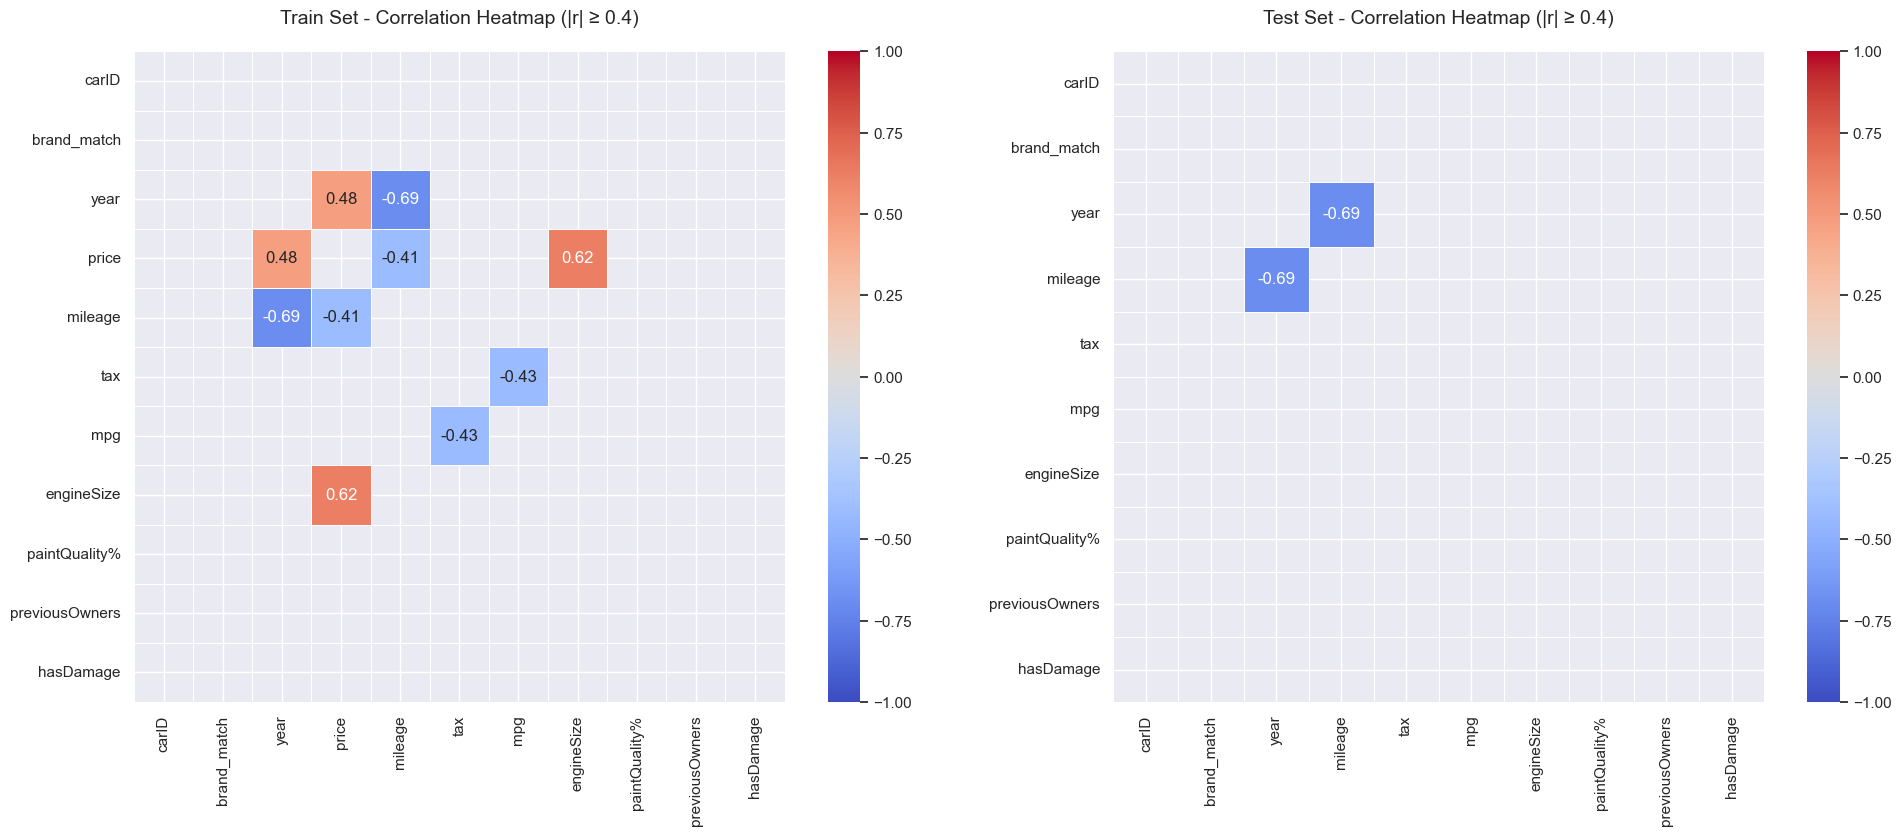

In [25]:
# === TRAIN SET (df) ===
clean_engine_size = df['engineSize'] == 0
df.loc[clean_engine_size, 'engineSize'] = np.nan
print("Train: engineSize == 0 → NaN count:", clean_engine_size.sum())
print("Train: Missing engineSize after cleaning:", df['engineSize'].isna().sum())

has_damage_null = df['hasDamage'].isna()
display(df.loc[has_damage_null].head())  # show first few NaN hasDamage rows

thr = 0.4
corr_train = df.corr(numeric_only=True)
mask_train = corr_train.abs() < thr
mask_train.values[np.diag_indices_from(mask_train)] = True

# === TEST SET (df_test) ===
clean_engine_size = df_test['engineSize'] == 0
df_test.loc[clean_engine_size, 'engineSize'] = np.nan
display(df_test['engineSize'].isna().sum())

has_damage_null = df_test['hasDamage'].isna()
display(df_test.loc[has_damage_null].head())

thr = 0.4
corr_test = df_test.corr(numeric_only=True)
mask_test = corr_test.abs() < thr
mask_test.values[np.diag_indices_from(mask_test)] = True

# === PLOT BOTH HEATMAPS SIDE BY SIDE ===
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Train heatmap
sns.heatmap(corr_train, mask=mask_train, vmin=-1, vmax=1, center=0,
            cmap='coolwarm', annot=True, fmt=".2f", square=True, linewidths=.5, ax=ax1)
ax1.set_title("Train Set - Correlation Heatmap (|r| ≥ 0.4)", fontsize=14, pad=20)

# Test heatmap
sns.heatmap(corr_test, mask=mask_test, vmin=-1, vmax=1, center=0,
            cmap='coolwarm', annot=True, fmt=".2f", square=True, linewidths=.5, ax=ax2)
ax2.set_title("Test Set - Correlation Heatmap (|r| ≥ 0.4)", fontsize=14, pad=20)

plt.tight_layout()
plt.show()

In [26]:
df.isnull().sum()
display(df.set_index('carID', inplace=True))

df_test.isnull().sum()
display(df_test.set_index('carID', inplace=True))

None

None

# 2. Preprocessing <a class="anchor" id="2-preprocessing"></a>

# 2.1 Feature Engineering <a class="anchor" id="21-feature"></a>

In [27]:

## Creation of age
ref_year = 2021
df['age'] = ref_year - df['year']
display(df[['year', 'age']].head())
df_test['age'] = ref_year - df_test['year']
display(df_test[['year', 'age']].head())

,year,age
carID,,
69512,2016.0,5.0
53000,2019.0,2.0
6366,2019.0,2.0
29021,2018.0,3.0
10062,2019.0,2.0


,year,age
carID,,
89856,2023.0,-2.0
106581,2017.0,4.0
80886,2016.0,5.0
100174,2019.0,2.0
81376,2019.0,2.0


In [28]:
### Creation of log for mileage as it is extremely right_skewed
df['log_mileage'] = np.log(df['mileage'])
df_test['log_mileage'] = np.log(df_test['mileage'])

In [29]:
index_for_null_brand_and_null_model = df[(df['Brand'].isnull()) & (df['model'].isnull())].index
df = df.drop(index = index_for_null_brand_and_null_model) 
# this cars will be impossible to find which cars are
index_for_null_brand_and_null_model = df_test[(df_test['Brand'].isnull()) & (df_test['model'].isnull())].index
df_test.loc[index_for_null_brand_and_null_model]  # Show rows to be dropped
df_test = df_test.drop(index=index_for_null_brand_and_null_model)


In [30]:
len(df)
brand_null = df[df['Brand'].isnull()].index
df.drop(index = brand_null, inplace = True)
len(df)
#we drop this as well as the models were not clear, so we could not assign them into a brand
#df.isnull().sum()

display(len(df_test))
brand_null = df_test[df_test['Brand'].isnull()].index
display(df_test.loc[brand_null].head())  # Show first few rows with null Brand
df_test.drop(index=brand_null, inplace=True)
display(len(df_test))


32551

,Brand,model,brand_match,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage,age,log_mileage
carID,,,,,,,,,,,,,,,
90234,NaN,amica,0.0,2007.0,Automatic,53000.0,Petrol,160.0,46.3,1.1,86.0,3.0,0.0,14.0,10.878047


32550

In [31]:
# preencher NAN's da coluna hasDamage com 1

df['hasDamage'] = df['hasDamage'].fillna(1)
df_test['hasDamage'] = df_test['hasDamage'].fillna(1)

# 2.2 Splitting Train, Test <a class="anchor" id="022-train"></a>

In [32]:
X = df.drop(['price', 'brand_match'], axis = 1)
y = df['price']

In [33]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, 
                                                  random_state = 42, 
                                                  shuffle = True)


# 2.3 Cleaning Outliers <a class="anchor" id="23-outliers"></a>

In [34]:
a = X_train['mileage'].quantile(0.25)
b = X_train['mileage'].quantile(0.75)
a_b = b - a
a_lower = a -1.5 * a_b
b_larger = b + 1.5 * a_b
X_train.loc[(X_train['mileage'] < a_lower) | (X_train['mileage'] > b_larger)]

,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage,age,log_mileage
carID,,,,,,,,,,,,,,
26822,Ford,kuga,2014.0,Manual,75207.0,Diesel,200.0,47.9,2.0,45.0,0.0,0.0,7.0,11.228000
16628,Ford,Fiesta,2007.0,Manual,115000.0,Petrol,160.0,45.6,1.4,53.0,NaN,0.0,14.0,11.652687
10249,BMW,3 Series,2011.0,Automatic,108000.0,Diesel,NaN,46.3,3.0,33.0,2.0,0.0,10.0,11.589887
61332,Opel,Crossland X,2019.0,Manual,83688.0,Petrol,145.0,47.1,1.2,39.0,2.0,0.0,2.0,11.334851
22594,Ford,mondeo,2017.0,Manual,90190.0,Diesel,0.0,74.3,1.5,3.0,1.0,0.0,4.0,11.409674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,Mercedes,C Class,2012.0,Automatic,86663.0,Petrol,160.0,44.8,NaN,56.0,4.0,0.0,9.0,11.369782
37000,Mercedes,E Class,2016.0,Automatic,72000.0,Diesel,30.0,65.7,2.0,80.0,0.0,0.0,5.0,11.184421
24351,Ford,Fiesta,2012.0,Manual,95299.0,Diesel,0.0,68.9,1.6,59.0,3.0,0.0,9.0,11.464775


In [35]:
def cleaning_outliers(training_set, val_set):
    X_train = training_set.copy()
    X_val = val_set.copy()
    num_cols = X_train.select_dtypes(include=np.number).columns
    for col in num_cols:
        q1 = X_train[col].quantile(0.25)
        q3 = X_train[col].quantile(0.75)
        iqr = q3 -q1
        lower = q1 -1.5 * iqr
        larger = q3 + 1.5 * iqr
        X_train.loc[X_train[col] < lower, col] = lower
        X_train.loc[X_train[col] > larger, col] = larger
        X_val.loc[X_val[col] < lower, col] = lower
        X_val.loc[X_val[col] > larger, col] = larger
    return X_train, X_val

X_train, X_val = cleaning_outliers(X_train, X_val)


In [36]:
a = X_train['mileage'].quantile(0.25)
b = X_train['mileage'].quantile(0.75)
a_b = b - a
a_lower = a -1.5 * a_b
b_larger = b + 1.5 * a_b
X_train.loc[(X_train['mileage'] == a_lower) | (X_train['mileage'] == b_larger)]

,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage,age,log_mileage
carID,,,,,,,,,,,,,,
26822,Ford,kuga,2014.0,Manual,70698.75,Diesel,175.0,47.9,2.0,45.0,0.0,0.0,7.0,11.228000
16628,Ford,Fiesta,2011.5,Manual,70698.75,Petrol,160.0,45.6,1.4,53.0,NaN,0.0,9.5,11.652687
10249,BMW,3 Series,2011.5,Automatic,70698.75,Diesel,NaN,46.3,3.0,33.0,2.0,0.0,9.5,11.589887
61332,Opel,Crossland X,2019.0,Manual,70698.75,Petrol,145.0,47.1,1.2,39.0,2.0,0.0,2.0,11.334851
22594,Ford,mondeo,2017.0,Manual,70698.75,Diesel,95.0,74.3,1.5,3.0,1.0,0.0,4.0,11.409674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,Mercedes,C Class,2012.0,Automatic,70698.75,Petrol,160.0,44.8,NaN,56.0,4.0,0.0,9.0,11.369782
37000,Mercedes,E Class,2016.0,Automatic,70698.75,Diesel,95.0,65.7,2.0,80.0,0.0,0.0,5.0,11.184421
24351,Ford,Fiesta,2012.0,Manual,70698.75,Diesel,95.0,68.9,1.6,59.0,3.0,0.0,9.0,11.464775


# 2.4 Cleaning NaN <a class="anchor" id="24-nan"></a>

In [37]:
display("Train (df) - Missing Values:", df.isnull().sum())
display("Test (df_test) - Missing Values:", df_test.isnull().sum())


'Train (df) - Missing Values:'

Brand                0
model             1481
brand_match          0
year              1490
price                0
transmission      1522
mileage           1463
fuelType          1674
tax               7902
mpg               7924
engineSize        1695
paintQuality%     1523
previousOwners    1548
hasDamage            0
age               1490
log_mileage       1463
dtype: int64

'Test (df_test) - Missing Values:'

Brand                0
model              634
brand_match          0
year               653
transmission       622
mileage            688
fuelType           737
tax               3306
mpg               3287
engineSize         720
paintQuality%      624
previousOwners     596
hasDamage            0
age                653
log_mileage        688
dtype: int64

In [38]:

# === TRAIN SET (df) ===
null_dataset_train = df.copy()
model_null_train = df.loc[df['model'].isnull()].index
null_dataset_train = null_dataset_train.loc[model_null_train].copy()
display("Train - Rows where model is null:", len(null_dataset_train))
display(null_dataset_train.head())

# === TEST SET (df_test) ===
null_dataset_test = df_test.copy()
model_null_test = df_test.loc[df_test['model'].isnull()].index
null_dataset_test = null_dataset_test.loc[model_null_test].copy()
display("Test - Rows where model is null:", len(null_dataset_test))
display(null_dataset_test.head())


'Train - Rows where model is null:'

1481

,Brand,model,brand_match,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage,age,log_mileage
carID,,,,,,,,,,,,,,,,
30317,Ford,NaN,0.0,2019.0,9999.0,Manual,10000.0,Petrol,145.0,47.9,NaN,61.0,3.0,0.0,2.0,9.210340
28739,Ford,NaN,0.0,2015.0,7099.0,Manual,74176.0,Diesel,NaN,NaN,1.5,84.0,2.0,1.0,6.0,11.214196
63868,Opel,NaN,0.0,2016.0,8695.0,Manual,39460.0,Petrol,125.0,50.4,1.4,99.0,1.0,0.0,5.0,10.583043
18304,Ford,NaN,0.0,2016.0,9632.0,Manual,18814.0,Petrol,20.0,62.8,1.0,74.0,NaN,0.0,5.0,9.842357
65285,Opel,NaN,0.0,2016.0,6999.0,Manual,45367.0,Petrol,30.0,55.4,1.4,41.0,2.0,0.0,5.0,10.722540


'Test - Rows where model is null:'

634

,Brand,model,brand_match,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage,age,log_mileage
carID,,,,,,,,,,,,,,,
84196,Ford,NaN,0.0,2008.0,Manual,56000.0,Petrol,145.0,49.6,1.4,38.0,3.0,0.0,13.0,10.933107
89973,Hyundai,NaN,0.0,2015.0,Manual,42910.0,Petrol,20.0,NaN,1.0,89.0,1.0,0.0,6.0,10.666860
77561,Audi,NaN,0.0,2016.0,Semi-Auto,63938.0,Diesel,160.0,50.4,2.0,77.0,0.0,0.0,5.0,11.065669
97739,Skoda,NaN,0.0,2016.0,Manual,22996.0,Diesel,30.0,64.2,2.0,65.0,3.0,0.0,5.0,10.043076
77228,Audi,NaN,0.0,2015.0,Manual,39056.0,Diesel,200.0,47.9,2.0,39.0,1.0,0.0,6.0,10.572752


In [39]:

# === 1. Learn mappings from TRAIN (df) only ===
get_mode = lambda s: s.mode().iat[0] if not s.mode().empty else np.nan

# Brand + year → model (primary)
by_brand_year_clean_model = (
    df.dropna(subset=['Brand', 'year', 'model'])
      .groupby(['Brand', 'year'])['model']
      .agg(get_mode)
)

# Brand → model (fallback)
by_brand_clean_model = (
    df.dropna(subset=['Brand', 'model'])
      .groupby('Brand')['model']
      .agg(get_mode)
)

display("Train mappings created:")
display("Brand+year → model (unique combos):", len(by_brand_year_clean_model))
display("Brand → model (unique brands):", len(by_brand_clean_model))


# === 2. Define fill function (uses train maps only) ===
def fill_model_using_train_maps(df_to_fill, by_brand_year, by_brand):
    df = df_to_fill.copy()
    mask = df['model'].isna()

    # Step 1: Brand + year
    if mask.any():
        fill1 = (
            df.loc[mask, ['Brand', 'year']]
              .merge(by_brand_year.rename('fill_model'),
                     how='left', left_on=['Brand', 'year'], right_index=True)['fill_model']
        )
        df.loc[mask, 'model'] = fill1.to_numpy()

    # Step 2: Fallback Brand only
    mask = df['model'].isna()
    if mask.any():
        df.loc[mask, 'model'] = df.loc[mask, 'Brand'].map(by_brand)

    return df


# === 3. Apply to df (train) and df_test ===
display("\nBefore filling:")
display("Train (df) - model nulls:", df['model'].isna().sum())
display("Test (df_test) - model nulls:", df_test['model'].isna().sum())

# Fill both
df = fill_model_using_train_maps(df, by_brand_year_clean_model, by_brand_clean_model)
df_test = fill_model_using_train_maps(df_test, by_brand_year_clean_model, by_brand_clean_model)

display("\nAfter filling:")
display("Train (df) - model nulls:", df['model'].isna().sum())
display("Test (df_test) - model nulls:", df_test['model'].isna().sum())

'Train mappings created:'

'Brand+year → model (unique combos):'

197

'Brand → model (unique brands):'

9

'\nBefore filling:'

'Train (df) - model nulls:'

np.int64(1481)

'Test (df_test) - model nulls:'

np.int64(634)

'\nAfter filling:'

'Train (df) - model nulls:'

np.int64(0)

'Test (df_test) - model nulls:'

np.int64(0)

In [40]:
import numpy as np
import pandas as pd

# === 1. Learn Brand + model → median year from TRAIN only ===
get_median = lambda s: s.median(skipna=True) if s.notna().any() else np.nan

by_brand_model_clean_year = (
    df.groupby(['Brand', 'model'])['year']
      .agg(get_median)
)

display("Train mapping: Brand + model → median year (unique combos):", len(by_brand_model_clean_year))

# === 2. Fill using Brand + model (with diagnostic) ===
def fill_year_with_diagnostics(df_to_fill, by_brand_model, name="Data"):
    df = df_to_fill.copy()
    mask = df['year'].isna()
    print(f"\n--- {name} ---")
    print(f"Missing 'year' before: {mask.sum()}")

    if mask.any():
        # Try to fill with Brand + model
        to_fill = df.loc[mask, ['Brand', 'model']].copy()
        to_fill = to_fill.merge(
            by_brand_model.rename('fill_year'),
            how='left',
            left_on=['Brand', 'model'],
            right_index=True
        )
        not_found = to_fill['fill_year'].isna().sum()
        print(f"  → {not_found} rows have Brand+model NOT seen in train")

        df.loc[mask, 'year'] = to_fill['fill_year'].to_numpy()

    print(f"Missing 'year' after Brand+model: {df['year'].isna().sum()}")
    return df, not_found

# === 3. Apply to df and df_test ===
df, _ = fill_year_with_diagnostics(df, by_brand_model_clean_year, "TRAIN")
df_test, test_not_found = fill_year_with_diagnostics(df_test, by_brand_model_clean_year, "TEST")

# === 4. Fallback: Fill remaining with Brand-only median ===
by_brand_year = df.groupby('Brand')['year'].median()

mask_test = df_test['year'].isna()
if mask_test.any():
    filled_count = mask_test.sum()
    df_test.loc[mask_test, 'year'] = df_test.loc[mask_test, 'Brand'].map(by_brand_year)
    print(f"Filled {filled_count} missing year values using Brand-only median. Final nulls: {df_test['year'].isna().sum()}")

# === 5. Final check ===
display("\nFINAL YEAR NULL COUNTS:")
display("Train (df) - year nulls:", df['year'].isna().sum())
display("Test (df_test) - year nulls:", df_test['year'].isna().sum())

'Train mapping: Brand + model → median year (unique combos):'

244


--- TRAIN ---
Missing 'year' before: 1490
  → 0 rows have Brand+model NOT seen in train
Missing 'year' after Brand+model: 0

--- TEST ---
Missing 'year' before: 653
  → 153 rows have Brand+model NOT seen in train
Missing 'year' after Brand+model: 153
Filled 153 missing year values using Brand-only median. Final nulls: 0


'\nFINAL YEAR NULL COUNTS:'

'Train (df) - year nulls:'

np.int64(0)

'Test (df_test) - year nulls:'

np.int64(0)

In [42]:
# === 1. Learn mappings from TRAIN (df) only ===
get_mode = lambda s: s.mode().iat[0] if not s.mode().empty else np.nan

# Primary: Brand + model + year
by_brand_model_year_clean_transmission = (
    df.dropna(subset=['transmission'])
      .groupby(['Brand', 'model', 'year'])['transmission']
      .agg(get_mode)
)

# Fallback 1: Brand + model
by_brand_model_clean_transmission = (
    df.dropna(subset=['transmission'])
      .groupby(['Brand', 'model'])['transmission']
      .agg(get_mode)
)

# Fallback 2: Brand only (NEW)
by_brand_clean_transmission = (
    df.dropna(subset=['transmission'])
      .groupby('Brand')['transmission']
      .agg(get_mode)
)

display("Train mappings created:")
display("  Brand+model+year → transmission:", len(by_brand_model_year_clean_transmission))
display("  Brand+model → transmission:", len(by_brand_model_clean_transmission))
display("  Brand → transmission:", len(by_brand_clean_transmission))


# === 2. Fill with diagnostics + final fallback ===
def fill_transmission_final(df_to_fill, map_bmy, map_bm, map_b, name="Data"):
    df = df_to_fill.copy()
    mask = df['transmission'].isna()
    print(f"\n--- {name} ---")
    print(f"Missing 'transmission' before: {mask.sum()}")

    filled = 0

    # Step 1: Brand + model + year
    if mask.any():
        to_fill = df.loc[mask, ['Brand', 'model', 'year']].copy()
        merged = to_fill.merge(map_bmy.rename('fill'), how='left', left_on=['Brand','model','year'], right_index=True)
        not_found = merged['fill'].isna().sum()
        print(f"  → {not_found} rows have Brand+model+year NOT seen in train")
        df.loc[mask, 'transmission'] = merged['fill'].to_numpy()
        filled += (mask.sum() - not_found)
        mask = df['transmission'].isna()

    # Step 2: Brand + model
    if mask.any():
        to_fill = df.loc[mask, ['Brand', 'model']].copy()
        idx = pd.MultiIndex.from_frame(to_fill)
        filled_series = map_bm.reindex(idx)
        not_found = filled_series.isna().sum()
        print(f"  → {not_found} rows have Brand+model NOT seen in train")
        df.loc[mask, 'transmission'] = filled_series.to_numpy()
        filled += (mask.sum() - not_found)
        mask = df['transmission'].isna()

    # Step 3: Brand only (FINAL FALLBACK)
    if mask.any():
        remaining = mask.sum()
        df.loc[mask, 'transmission'] = df.loc[mask, 'Brand'].map(map_b)
        filled += remaining
        still_missing = df['transmission'].isna().sum()
        print(f"Filled {remaining} missing transmission values using Brand-only mode. Final nulls: {still_missing}")

    print(f"Total filled: {filled}. Final nulls: {df['transmission'].isna().sum()}")
    return df


# === 3. Apply to both ===
df = fill_transmission_final(
    df, by_brand_model_year_clean_transmission,
    by_brand_model_clean_transmission, by_brand_clean_transmission, "TRAIN"
)

df_test = fill_transmission_final(
    df_test, by_brand_model_year_clean_transmission,
    by_brand_model_clean_transmission, by_brand_clean_transmission, "TEST"
)


# === 4. Final verification ===
display("\nFINAL TRANSMISSION NULL COUNTS:")
display("Train (df) - transmission nulls:", df['transmission'].isna().sum())
display("Test (df_test) - transmission nulls:", df_test['transmission'].isna().sum())

'Train mappings created:'

'  Brand+model+year → transmission:'

1805

'  Brand+model → transmission:'

244

'  Brand → transmission:'

9


--- TRAIN ---
Missing 'transmission' before: 0
Total filled: 0. Final nulls: 0

--- TEST ---
Missing 'transmission' before: 163
  → 163 rows have Brand+model+year NOT seen in train
  → 163 rows have Brand+model NOT seen in train
Filled 163 missing transmission values using Brand-only mode. Final nulls: 0
Total filled: 163. Final nulls: 0


'\nFINAL TRANSMISSION NULL COUNTS:'

'Train (df) - transmission nulls:'

np.int64(0)

'Test (df_test) - transmission nulls:'

np.int64(0)

In [43]:
# === 1. Learn median mileage by year from TRAIN (df) only ===
get_median = lambda s: s.median(skipna=True) if s.notna().any() else np.nan

by_year_clean_mileage = (
    df.dropna(subset=['mileage'])
      .groupby('year')['mileage']
      .agg(get_median)
)

display("Train mapping: year → median mileage (unique years):", len(by_year_clean_mileage))

# Global fallback (from train)
global_median_mileage = df['mileage'].median()

# === 2. Fill function with diagnostics + global fallback ===
def fill_mileage_with_diagnostics(df_to_fill, by_year, global_med, name="Data"):
    df = df_to_fill.copy()
    mask = df['mileage'].isna()
    print(f"\n--- {name} ---")
    print(f"Missing 'mileage' before: {mask.sum()}")

    filled = 0

    # Step 1: Use year → median mileage
    if mask.any():
        to_fill = df.loc[mask, ['year']].copy()
        merged = to_fill.merge(
            by_year.rename('fill_mileage'),
            how='left',
            left_on='year',
            right_index=True
        )
        not_found = merged['fill_mileage'].isna().sum()
        print(f"  → {not_found} rows have year NOT seen in train")

        df.loc[mask, 'mileage'] = merged['fill_mileage'].to_numpy()
        filled += (mask.sum() - not_found)
        mask = df['mileage'].isna()

    # Step 2: Fallback to global median
    if mask.any():
        remaining = mask.sum()
        df.loc[mask, 'mileage'] = global_med
        print(f"Filled {remaining} missing mileage values using global median ({global_med}). Final nulls: {df['mileage'].isna().sum()}")
        filled += remaining

    print(f"Total filled: {filled}. Final nulls: {df['mileage'].isna().sum()}")
    return df


# === 3. Apply to df and df_test ===
df = fill_mileage_with_diagnostics(df, by_year_clean_mileage, global_median_mileage, "TRAIN")
df_test = fill_mileage_with_diagnostics(df_test, by_year_clean_mileage, global_median_mileage, "TEST")

# === 4. Final check ===
display("\nFINAL MILEAGE NULL COUNTS:")
display("Train (df) - mileage nulls:", df['mileage'].isna().sum())
display("Test (df_test) - mileage nulls:", df_test['mileage'].isna().sum())

'Train mapping: year → median mileage (unique years):'

30


--- TRAIN ---
Missing 'mileage' before: 1463
  → 0 rows have year NOT seen in train
Total filled: 1463. Final nulls: 0

--- TEST ---
Missing 'mileage' before: 688
  → 0 rows have year NOT seen in train
Total filled: 688. Final nulls: 0


'\nFINAL MILEAGE NULL COUNTS:'

'Train (df) - mileage nulls:'

np.int64(0)

'Test (df_test) - mileage nulls:'

np.int64(0)

In [44]:
# === 1. Learn mappings from TRAIN (df) only ===
get_mode = lambda s: s.mode().iat[0] if not s.mode().empty else np.nan

# Level 1: Brand + model + year
by_brand_model_year_clean_fuelType = (
    df.dropna(subset=['fuelType'])
      .groupby(['Brand', 'model', 'year'])['fuelType']
      .agg(get_mode)
)

# Level 2: Brand + model
by_brand_model_clean_fuelType = (
    df.dropna(subset=['fuelType'])
      .groupby(['Brand', 'model'])['fuelType']
      .agg(get_mode)
)

# Level 3: Brand only
by_brand_clean_fuelType = (
    df.dropna(subset=['fuelType'])
      .groupby('Brand')['fuelType']
      .agg(get_mode)
)

# Level 4: Global mode (fallback)
global_mode_fuelType = df['fuelType'].mode().iat[0] if not df['fuelType'].mode().empty else 'Petrol'

display("Train mappings created:")
display("  Brand+model+year → fuelType:", len(by_brand_model_year_clean_fuelType))
display("  Brand+model → fuelType:", len(by_brand_model_clean_fuelType))
display("  Brand → fuelType:", len(by_brand_clean_fuelType))
display("  Global mode:", global_mode_fuelType)


# === 2. Fill function with diagnostics + global fallback ===
def fill_fuelType_final(df_to_fill, map_bmy, map_bm, map_b, global_mode, name="Data"):
    df = df_to_fill.copy()
    mask = df['fuelType'].isna()
    print(f"\n--- {name} ---")
    print(f"Missing 'fuelType' before: {mask.sum()}")

    filled = 0

    # Step 1: Brand + model + year
    if mask.any():
        to_fill = df.loc[mask, ['Brand', 'model', 'year']].copy()
        merged = to_fill.merge(map_bmy.rename('fill'), how='left', left_on=['Brand','model','year'], right_index=True)
        not_found = merged['fill'].isna().sum()
        print(f"  → {not_found} rows have Brand+model+year NOT seen in train")
        df.loc[mask, 'fuelType'] = merged['fill'].to_numpy()
        filled += (mask.sum() - not_found)
        mask = df['fuelType'].isna()

    # Step 2: Brand + model
    if mask.any():
        to_fill = df.loc[mask, ['Brand', 'model']].copy()
        idx = pd.MultiIndex.from_frame(to_fill)
        filled_series = map_bm.reindex(idx)
        not_found = filled_series.isna().sum()
        print(f"  → {not_found} rows have Brand+model NOT seen in train")
        df.loc[mask, 'fuelType'] = filled_series.to_numpy()
        filled += (mask.sum() - not_found)
        mask = df['fuelType'].isna()

    # Step 3: Brand only
    if mask.any():
        remaining = mask.sum()
        df.loc[mask, 'fuelType'] = df.loc[mask, 'Brand'].map(map_b)
        still_missing = df['fuelType'].isna().sum()
        filled += (remaining - still_missing)
        print(f"  → {still_missing} rows have Brand NOT seen in train")
        mask = df['fuelType'].isna()

    # Step 4: Global mode
    if mask.any():
        remaining = mask.sum()
        df.loc[mask, 'fuelType'] = global_mode
        print(f"Filled {remaining} missing fuelType values using global mode ('{global_mode}'). Final nulls: 0")
        filled += remaining

    print(f"Total filled: {filled}. Final nulls: {df['fuelType'].isna().sum()}")
    return df


# === 3. Apply to both ===
df = fill_fuelType_final(
    df, by_brand_model_year_clean_fuelType,
    by_brand_model_clean_fuelType, by_brand_clean_fuelType,
    global_mode_fuelType, "TRAIN"
)

df_test = fill_fuelType_final(
    df_test, by_brand_model_year_clean_fuelType,
    by_brand_model_clean_fuelType, by_brand_clean_fuelType,
    global_mode_fuelType, "TEST"
)


# === 4. Final check ===
display("\nFINAL FUELTYPE NULL COUNTS:")
display("Train (df) - fuelType nulls:", df['fuelType'].isna().sum())
display("Test (df_test) - fuelType nulls:", df_test['fuelType'].isna().sum())

'Train mappings created:'

'  Brand+model+year → fuelType:'

1793

'  Brand+model → fuelType:'

243

'  Brand → fuelType:'

9

'  Global mode:'

'Petrol'


--- TRAIN ---
Missing 'fuelType' before: 1674
  → 12 rows have Brand+model+year NOT seen in train
  → 1 rows have Brand+model NOT seen in train
  → 0 rows have Brand NOT seen in train
Total filled: 1674. Final nulls: 0

--- TEST ---
Missing 'fuelType' before: 737
  → 204 rows have Brand+model+year NOT seen in train
  → 201 rows have Brand+model NOT seen in train
  → 0 rows have Brand NOT seen in train
Total filled: 737. Final nulls: 0


'\nFINAL FUELTYPE NULL COUNTS:'

'Train (df) - fuelType nulls:'

np.int64(0)

'Test (df_test) - fuelType nulls:'

np.int64(0)

In [45]:
#LIMPAR tax

# === 1. Learn mappings from TRAIN (df) only ===
get_median = lambda s: s.median(skipna=True) if s.notna().any() else np.nan

# Level 1: Brand + model + year
by_brand_model_year_clean_tax = (
    df.dropna(subset=['tax'])
      .groupby(['Brand', 'model', 'year'])['tax']
      .agg(get_median)
)

# Level 2: Brand + model
by_brand_model_clean_tax = (
    df.dropna(subset=['tax'])
      .groupby(['Brand', 'model'])['tax']
      .agg(get_median)
)

# Level 3: Brand only
by_brand_clean_tax = (
    df.dropna(subset=['tax'])
      .groupby('Brand')['tax']
      .agg(get_median)
)

# Level 4: Global median
global_median_tax = df['tax'].median()

display("Train mappings created:")
display("  Brand+model+year → tax:", len(by_brand_model_year_clean_tax))
display("  Brand+model → tax:", len(by_brand_model_clean_tax))
display("  Brand → tax:", len(by_brand_clean_tax))
display("  Global median tax:", global_median_tax)


# === 2. Fill function with diagnostics + global fallback ===
def fill_tax_final(df_to_fill, map_bmy, map_bm, map_b, global_med, name="Data"):
    df = df_to_fill.copy()
    mask = df['tax'].isna()
    print(f"\n--- {name} ---")
    print(f"Missing 'tax' before: {mask.sum()}")

    filled = 0

    # Step 1: Brand + model + year
    if mask.any():
        to_fill = df.loc[mask, ['Brand', 'model', 'year']].copy()
        merged = to_fill.merge(map_bmy.rename('fill'), how='left', left_on=['Brand','model','year'], right_index=True)
        not_found = merged['fill'].isna().sum()
        print(f"  → {not_found} rows have Brand+model+year NOT seen in train")
        df.loc[mask, 'tax'] = merged['fill'].to_numpy()
        filled += (mask.sum() - not_found)
        mask = df['tax'].isna()

    # Step 2: Brand + model
    if mask.any():
        to_fill = df.loc[mask, ['Brand', 'model']].copy()
        idx = pd.MultiIndex.from_frame(to_fill)
        filled_series = map_bm.reindex(idx)
        not_found = filled_series.isna().sum()
        print(f"  → {not_found} rows have Brand+model NOT seen in train")
        df.loc[mask, 'tax'] = filled_series.to_numpy()
        filled += (mask.sum() - not_found)
        mask = df['tax'].isna()

    # Step 3: Brand only
    if mask.any():
        remaining = mask.sum()
        df.loc[mask, 'tax'] = df.loc[mask, 'Brand'].map(map_b)
        still_missing = df['tax'].isna().sum()
        filled += (remaining - still_missing)
        print(f"  → {still_missing} rows have Brand NOT seen in train")
        mask = df['tax'].isna()

    # Step 4: Global median
    if mask.any():
        remaining = mask.sum()
        df.loc[mask, 'tax'] = global_med
        print(f"Filled {remaining} missing tax values using global median ({global_med}). Final nulls: 0")
        filled += remaining

    print(f"Total filled: {filled}. Final nulls: {df['tax'].isna().sum()}")
    return df


# === 3. Apply to both ===
df = fill_tax_final(
    df, by_brand_model_year_clean_tax,
    by_brand_model_clean_tax, by_brand_clean_tax,
    global_median_tax, "TRAIN"
)

df_test = fill_tax_final(
    df_test, by_brand_model_year_clean_tax,
    by_brand_model_clean_tax, by_brand_clean_tax,
    global_median_tax, "TEST"
)


# === 4. Final check ===
display("\nFINAL TAX NULL COUNTS:")
display("Train (df) - tax nulls:", df['tax'].isna().sum())
display("Test (df_test) - tax nulls:", df_test['tax'].isna().sum())

'Train mappings created:'

'  Brand+model+year → tax:'

1791

'  Brand+model → tax:'

244

'  Brand → tax:'

9

'  Global median tax:'

np.float64(145.0)


--- TRAIN ---
Missing 'tax' before: 7902
  → 15 rows have Brand+model+year NOT seen in train
  → 0 rows have Brand+model NOT seen in train
Total filled: 7902. Final nulls: 0

--- TEST ---
Missing 'tax' before: 3306
  → 1235 rows have Brand+model+year NOT seen in train
  → 1229 rows have Brand+model NOT seen in train
  → 0 rows have Brand NOT seen in train
Total filled: 3306. Final nulls: 0


'\nFINAL TAX NULL COUNTS:'

'Train (df) - tax nulls:'

np.int64(0)

'Test (df_test) - tax nulls:'

np.int64(0)

In [46]:
#LIMPAR mpg

# === 1. Learn mappings from TRAIN (df) only ===
get_median = lambda s: s.median(skipna=True) if s.notna().any() else np.nan

# Level 1: Brand + model + year
by_brand_model_year_clean_mpg = (
    df.dropna(subset=['mpg'])
      .groupby(['Brand', 'model', 'year'])['mpg']
      .agg(get_median)
)

# Level 2: Brand + model
by_brand_model_clean_mpg = (
    df.dropna(subset=['mpg'])
      .groupby(['Brand', 'model'])['mpg']
      .agg(get_median)
)

# Level 3: Brand only
by_brand_clean_mpg = (
    df.dropna(subset=['mpg'])
      .groupby('Brand')['mpg']
      .agg(get_median)
)

# Level 4: Global median
global_median_mpg = df['mpg'].median()

display("Train mappings created:")
display("  Brand+model+year → mpg:", len(by_brand_model_year_clean_mpg))
display("  Brand+model → mpg:", len(by_brand_model_clean_mpg))
display("  Brand → mpg:", len(by_brand_clean_mpg))
display("  Global median mpg:", global_median_mpg)


# === 2. Fill function with diagnostics + global fallback ===
def fill_mpg_final(df_to_fill, map_bmy, map_bm, map_b, global_med, name="Data"):
    df = df_to_fill.copy()
    mask = df['mpg'].isna()
    print(f"\n--- {name} ---")
    print(f"Missing 'mpg' before: {mask.sum()}")

    filled = 0

    # Step 1: Brand + model + year
    if mask.any():
        to_fill = df.loc[mask, ['Brand', 'model', 'year']].copy()
        merged = to_fill.merge(map_bmy.rename('fill'), how='left', left_on=['Brand','model','year'], right_index=True)
        not_found = merged['fill'].isna().sum()
        print(f"  → {not_found} rows have Brand+model+year NOT seen in train")
        df.loc[mask, 'mpg'] = merged['fill'].to_numpy()
        filled += (mask.sum() - not_found)
        mask = df['mpg'].isna()

    # Step 2: Brand + model
    if mask.any():
        to_fill = df.loc[mask, ['Brand', 'model']].copy()
        idx = pd.MultiIndex.from_frame(to_fill)
        filled_series = map_bm.reindex(idx)
        not_found = filled_series.isna().sum()
        print(f"  → {not_found} rows have Brand+model NOT seen in train")
        df.loc[mask, 'mpg'] = filled_series.to_numpy()
        filled += (mask.sum() - not_found)
        mask = df['mpg'].isna()

    # Step 3: Brand only
    if mask.any():
        remaining = mask.sum()
        df.loc[mask, 'mpg'] = df.loc[mask, 'Brand'].map(map_b)
        still_missing = df['mpg'].isna().sum()
        filled += (remaining - still_missing)
        print(f"  → {still_missing} rows have Brand NOT seen in train")
        mask = df['mpg'].isna()

    # Step 4: Global median
    if mask.any():
        remaining = mask.sum()
        df.loc[mask, 'mpg'] = global_med
        print(f"Filled {remaining} missing mpg values using global median ({global_med}). Final nulls: 0")
        filled += remaining

    print(f"Total filled: {filled}. Final nulls: {df['mpg'].isna().sum()}")
    return df


# === 3. Apply to both ===
df = fill_mpg_final(
    df, by_brand_model_year_clean_mpg,
    by_brand_model_clean_mpg, by_brand_clean_mpg,
    global_median_mpg, "TRAIN"
)

df_test = fill_mpg_final(
    df_test, by_brand_model_year_clean_mpg,
    by_brand_model_clean_mpg, by_brand_clean_mpg,
    global_median_mpg, "TEST"
)


# === 4. Final check ===
display("\nFINAL MPG NULL COUNTS:")
display("Train (df) - mpg nulls:", df['mpg'].isna().sum())
display("Test (df_test) - mpg nulls:", df_test['mpg'].isna().sum())

'Train mappings created:'

'  Brand+model+year → mpg:'

1791

'  Brand+model → mpg:'

244

'  Brand → mpg:'

9

'  Global median mpg:'

np.float64(54.3)


--- TRAIN ---
Missing 'mpg' before: 7924
  → 16 rows have Brand+model+year NOT seen in train
  → 0 rows have Brand+model NOT seen in train
Total filled: 7924. Final nulls: 0

--- TEST ---
Missing 'mpg' before: 3287
  → 1213 rows have Brand+model+year NOT seen in train
  → 1206 rows have Brand+model NOT seen in train
  → 0 rows have Brand NOT seen in train
Total filled: 3287. Final nulls: 0


'\nFINAL MPG NULL COUNTS:'

'Train (df) - mpg nulls:'

np.int64(0)

'Test (df_test) - mpg nulls:'

np.int64(0)

In [47]:
#LIMPAR engineSize
# === 1. Learn mappings from TRAIN (df) only ===
get_median = lambda s: s.median(skipna=True) if s.notna().any() else np.nan

# Level 1: Brand + model + year
by_brand_model_year_clean_engineSize = (
    df.dropna(subset=['engineSize'])
      .groupby(['Brand', 'model', 'year'])['engineSize']
      .agg(get_median)
)

# Level 2: Brand + model
by_brand_model_clean_engineSize = (
    df.dropna(subset=['engineSize'])
      .groupby(['Brand', 'model'])['engineSize']
      .agg(get_median)
)

# Level 3: Brand only
by_brand_clean_engineSize = (
    df.dropna(subset=['engineSize'])
      .groupby('Brand')['engineSize']
      .agg(get_median)
)

# Level 4: Global median
global_median_engineSize = df['engineSize'].median()

display("Train mappings created:")
display("  Brand+model+year → engineSize:", len(by_brand_model_year_clean_engineSize))
display("  Brand+model → engineSize:", len(by_brand_model_clean_engineSize))
display("  Brand → engineSize:", len(by_brand_clean_engineSize))
display("  Global median engineSize:", global_median_engineSize)


# === 2. Fill function with diagnostics + global fallback ===
def fill_engineSize_final(df_to_fill, map_bmy, map_bm, map_b, global_med, name="Data"):
    df = df_to_fill.copy()
    mask = df['engineSize'].isna()
    print(f"\n--- {name} ---")
    print(f"Missing 'engineSize' before: {mask.sum()}")

    filled = 0

    # Step 1: Brand + model + year
    if mask.any():
        to_fill = df.loc[mask, ['Brand', 'model', 'year']].copy()
        merged = to_fill.merge(map_bmy.rename('fill'), how='left', left_on=['Brand','model','year'], right_index=True)
        not_found = merged['fill'].isna().sum()
        print(f"  → {not_found} rows have Brand+model+year NOT seen in train")
        df.loc[mask, 'engineSize'] = merged['fill'].to_numpy()
        filled += (mask.sum() - not_found)
        mask = df['engineSize'].isna()

    # Step 2: Brand + model
    if mask.any():
        to_fill = df.loc[mask, ['Brand', 'model']].copy()
        idx = pd.MultiIndex.from_frame(to_fill)
        filled_series = map_bm.reindex(idx)
        not_found = filled_series.isna().sum()
        print(f"  → {not_found} rows have Brand+model NOT seen in train")
        df.loc[mask, 'engineSize'] = filled_series.to_numpy()
        filled += (mask.sum() - not_found)
        mask = df['engineSize'].isna()

    # Step 3: Brand only
    if mask.any():
        remaining = mask.sum()
        df.loc[mask, 'engineSize'] = df.loc[mask, 'Brand'].map(map_b)
        still_missing = df['engineSize'].isna().sum()
        filled += (remaining - still_missing)
        print(f"  → {still_missing} rows have Brand NOT seen in train")
        mask = df['engineSize'].isna()

    # Step 4: Global median
    if mask.any():
        remaining = mask.sum()
        df.loc[mask, 'engineSize'] = global_med
        print(f"Filled {remaining} missing engineSize values using global median ({global_med}). Final nulls: 0")
        filled += remaining

    print(f"Total filled: {filled}. Final nulls: {df['engineSize'].isna().sum()}")
    return df


# === 3. Apply to both ===
df = fill_engineSize_final(
    df, by_brand_model_year_clean_engineSize,
    by_brand_model_clean_engineSize, by_brand_clean_engineSize,
    global_median_engineSize, "TRAIN"
)

df_test = fill_engineSize_final(
    df_test, by_brand_model_year_clean_engineSize,
    by_brand_model_clean_engineSize, by_brand_clean_engineSize,
    global_median_engineSize, "TEST"
)


# === 4. Final check ===
display("\nFINAL ENGINESIZE NULL COUNTS:")
display("Train (df) - engineSize nulls:", df['engineSize'].isna().sum())
display("Test (df_test) - engineSize nulls:", df_test['engineSize'].isna().sum())

'Train mappings created:'

'  Brand+model+year → engineSize:'

1788

'  Brand+model → engineSize:'

242

'  Brand → engineSize:'

9

'  Global median engineSize:'

np.float64(1.6)


--- TRAIN ---
Missing 'engineSize' before: 1695
  → 19 rows have Brand+model+year NOT seen in train
  → 2 rows have Brand+model NOT seen in train
  → 0 rows have Brand NOT seen in train
Total filled: 1695. Final nulls: 0

--- TEST ---
Missing 'engineSize' before: 720
  → 199 rows have Brand+model+year NOT seen in train
  → 189 rows have Brand+model NOT seen in train
  → 0 rows have Brand NOT seen in train
Total filled: 720. Final nulls: 0


'\nFINAL ENGINESIZE NULL COUNTS:'

'Train (df) - engineSize nulls:'

np.int64(0)

'Test (df_test) - engineSize nulls:'

np.int64(0)

In [48]:
#LIMPAR paintQuality% 

# === 1. Learn mappings from TRAIN (df) only ===
get_median = lambda s: s.median(skipna=True) if s.notna().any() else np.nan

# Level 1: Brand + model + year
by_brand_model_year_clean_paintQuality = (
    df.dropna(subset=['paintQuality%'])
      .groupby(['Brand', 'model', 'year'])['paintQuality%']
      .agg(get_median)
)

# Level 2: Brand + model
by_brand_model_clean_paintQuality = (
    df.dropna(subset=['paintQuality%'])
      .groupby(['Brand', 'model'])['paintQuality%']
      .agg(get_median)
)

# Level 3: Brand only
by_brand_clean_paintQuality = (
    df.dropna(subset=['paintQuality%'])
      .groupby('Brand')['paintQuality%']
      .agg(get_median)
)

# Level 4: Global median
global_median_paintQuality = df['paintQuality%'].median()

display("Train mappings created:")
display("  Brand+model+year → paintQuality%:", len(by_brand_model_year_clean_paintQuality))
display("  Brand+model → paintQuality%:", len(by_brand_model_clean_paintQuality))
display("  Brand → paintQuality%:", len(by_brand_clean_paintQuality))
display("  Global median paintQuality%:", global_median_paintQuality)


# === 2. Fill function with diagnostics + global fallback ===
def fill_paintQuality_final(df_to_fill, map_bmy, map_bm, map_b, global_med, name="Data"):
    df = df_to_fill.copy()
    mask = df['paintQuality%'].isna()
    print(f"\n--- {name} ---")
    print(f"Missing 'paintQuality%' before: {mask.sum()}")

    filled = 0

    # Step 1: Brand + model + year
    if mask.any():
        to_fill = df.loc[mask, ['Brand', 'model', 'year']].copy()
        merged = to_fill.merge(map_bmy.rename('fill'), how='left', left_on=['Brand','model','year'], right_index=True)
        not_found = merged['fill'].isna().sum()
        print(f"  → {not_found} rows have Brand+model+year NOT seen in train")
        df.loc[mask, 'paintQuality%'] = merged['fill'].to_numpy()
        filled += (mask.sum() - not_found)
        mask = df['paintQuality%'].isna()

    # Step 2: Brand + model
    if mask.any():
        to_fill = df.loc[mask, ['Brand', 'model']].copy()
        idx = pd.MultiIndex.from_frame(to_fill)
        filled_series = map_bm.reindex(idx)
        not_found = filled_series.isna().sum()
        print(f"  → {not_found} rows have Brand+model NOT seen in train")
        df.loc[mask, 'paintQuality%'] = filled_series.to_numpy()
        filled += (mask.sum() - not_found)
        mask = df['paintQuality%'].isna()

    # Step 3: Brand only
    if mask.any():
        remaining = mask.sum()
        df.loc[mask, 'paintQuality%'] = df.loc[mask, 'Brand'].map(map_b)
        still_missing = df['paintQuality%'].isna().sum()
        filled += (remaining - still_missing)
        print(f"  → {still_missing} rows have Brand NOT seen in train")
        mask = df['paintQuality%'].isna()

    # Step 4: Global median
    if mask.any():
        remaining = mask.sum()
        df.loc[mask, 'paintQuality%'] = global_med
        print(f"Filled {remaining} missing paintQuality% values using global median ({global_med}). Final nulls: 0")
        filled += remaining

    print(f"Total filled: {filled}. Final nulls: {df['paintQuality%'].isna().sum()}")
    return df


# === 3. Apply to both ===
df = fill_paintQuality_final(
    df, by_brand_model_year_clean_paintQuality,
    by_brand_model_clean_paintQuality, by_brand_clean_paintQuality,
    global_median_paintQuality, "TRAIN"
)

df_test = fill_paintQuality_final(
    df_test, by_brand_model_year_clean_paintQuality,
    by_brand_model_clean_paintQuality, by_brand_clean_paintQuality,
    global_median_paintQuality, "TEST"
)


# === 4. Final check ===
display("\nFINAL PAINTQUALITY% NULL COUNTS:")
display("Train (df) - paintQuality% nulls:", df['paintQuality%'].isna().sum())
display("Test (df_test) - paintQuality% nulls:", df_test['paintQuality%'].isna().sum())

'Train mappings created:'

'  Brand+model+year → paintQuality%:'

1792

'  Brand+model → paintQuality%:'

242

'  Brand → paintQuality%:'

9

'  Global median paintQuality%:'

np.float64(65.0)


--- TRAIN ---
Missing 'paintQuality%' before: 1523
  → 13 rows have Brand+model+year NOT seen in train
  → 2 rows have Brand+model NOT seen in train
  → 0 rows have Brand NOT seen in train
Total filled: 1523. Final nulls: 0

--- TEST ---
Missing 'paintQuality%' before: 624
  → 172 rows have Brand+model+year NOT seen in train
  → 163 rows have Brand+model NOT seen in train
  → 0 rows have Brand NOT seen in train
Total filled: 624. Final nulls: 0


'\nFINAL PAINTQUALITY% NULL COUNTS:'

'Train (df) - paintQuality% nulls:'

np.int64(0)

'Test (df_test) - paintQuality% nulls:'

np.int64(0)

In [49]:
#LIMPAR previousOwners

# === 1. Learn mappings from TRAIN (df) only ===
get_median = lambda s: s.median(skipna=True) if s.notna().any() else np.nan

# Level 1: Brand + model + year
by_brand_model_year_clean_previousOwners = (
    df.dropna(subset=['previousOwners'])
      .groupby(['Brand', 'model', 'year'])['previousOwners']
      .agg(get_median)
)

# Level 2: Brand + model
by_brand_model_clean_previousOwners = (
    df.dropna(subset=['previousOwners'])
      .groupby(['Brand', 'model'])['previousOwners']
      .agg(get_median)
)

# Level 3: Brand only
by_brand_clean_previousOwners = (
    df.dropna(subset=['previousOwners'])
      .groupby('Brand')['previousOwners']
      .agg(get_median)
)

# Level 4: Global median
global_median_previousOwners = df['previousOwners'].median()

display("Train mappings created:")
display("  Brand+model+year → previousOwners:", len(by_brand_model_year_clean_previousOwners))
display("  Brand+model → previousOwners:", len(by_brand_model_clean_previousOwners))
display("  Brand → previousOwners:", len(by_brand_clean_previousOwners))
display("  Global median previousOwners:", global_median_previousOwners)


# === 2. Fill function with diagnostics + global fallback ===
def fill_previousOwners_final(df_to_fill, map_bmy, map_bm, map_b, global_med, name="Data"):
    df = df_to_fill.copy()
    mask = df['previousOwners'].isna()
    print(f"\n--- {name} ---")
    print(f"Missing 'previousOwners' before: {mask.sum()}")

    filled = 0

    # Step 1: Brand + model + year
    if mask.any():
        to_fill = df.loc[mask, ['Brand', 'model', 'year']].copy()
        merged = to_fill.merge(map_bmy.rename('fill'), how='left', left_on=['Brand','model','year'], right_index=True)
        not_found = merged['fill'].isna().sum()
        print(f"  → {not_found} rows have Brand+model+year NOT seen in train")
        df.loc[mask, 'previousOwners'] = merged['fill'].to_numpy()
        filled += (mask.sum() - not_found)
        mask = df['previousOwners'].isna()

    # Step 2: Brand + model
    if mask.any():
        to_fill = df.loc[mask, ['Brand', 'model']].copy()
        idx = pd.MultiIndex.from_frame(to_fill)
        filled_series = map_bm.reindex(idx)
        not_found = filled_series.isna().sum()
        print(f"  → {not_found} rows have Brand+model NOT seen in train")
        df.loc[mask, 'previousOwners'] = filled_series.to_numpy()
        filled += (mask.sum() - not_found)
        mask = df['previousOwners'].isna()

    # Step 3: Brand only
    if mask.any():
        to_fill = df.loc[mask, ['Brand']].copy()
        merged = to_fill.merge(map_b.rename('fill'), how='left', left_on='Brand', right_index=True)
        not_found = merged['fill'].isna().sum()
        print(f"  → {not_found} rows have Brand NOT seen in train")
        df.loc[mask, 'previousOwners'] = merged['fill'].to_numpy()
        filled += (mask.sum() - not_found)
        mask = df['previousOwners'].isna()

    # Step 4: Global median
    if mask.any():
        remaining = mask.sum()
        df.loc[mask, 'previousOwners'] = global_med
        print(f"Filled {remaining} missing previousOwners values using global median ({global_med}). Final nulls: 0")
        filled += remaining

    print(f"Total filled: {filled}. Final nulls: {df['previousOwners'].isna().sum()}")
    return df


# === 3. Apply to both ===
df = fill_previousOwners_final(
    df, by_brand_model_year_clean_previousOwners,
    by_brand_model_clean_previousOwners, by_brand_clean_previousOwners,
    global_median_previousOwners, "TRAIN"
)

df_test = fill_previousOwners_final(
    df_test, by_brand_model_year_clean_previousOwners,
    by_brand_model_clean_previousOwners, by_brand_clean_previousOwners,
    global_median_previousOwners, "TEST"
)


# === 4. Final check ===
display("\nFINAL PREVIOUSOWNERS NULL COUNTS:")
display("Train (df) - previousOwners nulls:", df['previousOwners'].isna().sum())
display("Test (df_test) - previousOwners nulls:", df_test['previousOwners'].isna().sum())

'Train mappings created:'

'  Brand+model+year → previousOwners:'

1798

'  Brand+model → previousOwners:'

243

'  Brand → previousOwners:'

9

'  Global median previousOwners:'

np.float64(2.0)


--- TRAIN ---
Missing 'previousOwners' before: 1548
  → 7 rows have Brand+model+year NOT seen in train
  → 1 rows have Brand+model NOT seen in train
  → 0 rows have Brand NOT seen in train
Total filled: 1548. Final nulls: 0

--- TEST ---
Missing 'previousOwners' before: 596
  → 155 rows have Brand+model+year NOT seen in train
  → 151 rows have Brand+model NOT seen in train
  → 0 rows have Brand NOT seen in train
Total filled: 596. Final nulls: 0


'\nFINAL PREVIOUSOWNERS NULL COUNTS:'

'Train (df) - previousOwners nulls:'

np.int64(0)

'Test (df_test) - previousOwners nulls:'

np.int64(0)

In [50]:
# input NaNs for age
# === 1. Define robust clean_age with diagnostics ===
def clean_age_final(df_to_clean, ref_year=2021, name="Data"):
    df = df_to_clean.copy()
    print(f"\n--- {name} ---")
    
    # Check if 'year' exists
    if 'year' not in df.columns:
        raise ValueError("'year' column not found in DataFrame")
    
    # Count missing age before
    missing_before = df['age'].isna().sum()
    print(f"Missing 'age' before: {missing_before}")
    
    # Only fill where age is NaN and year is valid
    mask_age_null = df['age'].isna()
    mask_year_valid = df['year'].notna()
    mask = mask_age_null & mask_year_valid
    
    filled = mask.sum()
    if filled > 0:
        df.loc[mask, 'age'] = ref_year - df.loc[mask, 'year']
        print(f"Filled {filled} missing 'age' values using {ref_year} - year")
    
    # Warn if year was missing (couldn't fill)
    unfilled = mask_age_null.sum() - filled
    if unfilled > 0:
        print(f"Warning: {unfilled} rows have missing 'age' AND 'year' → cannot fill")

    print(f"Missing 'age' after: {df['age'].isna().sum()}")
    return df


# === 2. Apply to both df and df_test ===
df = clean_age_final(df, ref_year=2021, name="TRAIN")
df_test = clean_age_final(df_test, ref_year=2021, name="TEST")


# === 3. Final verification ===
display("\nFINAL AGE NULL COUNTS:")
display("Train (df) - age nulls:", df['age'].isna().sum())
display("Test (df_test) - age nulls:", df_test['age'].isna().sum())


--- TRAIN ---
Missing 'age' before: 1490
Filled 1490 missing 'age' values using 2021 - year
Missing 'age' after: 0

--- TEST ---
Missing 'age' before: 653
Filled 653 missing 'age' values using 2021 - year
Missing 'age' after: 0


'\nFINAL AGE NULL COUNTS:'

'Train (df) - age nulls:'

np.int64(0)

'Test (df_test) - age nulls:'

np.int64(0)

In [51]:
# === 1. Define robust clean_log_mileage with diagnostics ===
def clean_log_mileage_final(df_to_clean, name="Data"):
    df = df_to_clean.copy()
    print(f"\n--- {name} ---")
    
    # Check required columns
    if 'mileage' not in df.columns:
        raise ValueError("'mileage' column not found in DataFrame")
    if 'log_mileage' not in df.columns:
        df['log_mileage'] = np.nan  # create if missing
    
    # Count missing log_mileage before
    missing_before = df['log_mileage'].isna().sum()
    print(f"Missing 'log_mileage' before: {missing_before}")
    
    # Only fill where log_mileage is NaN and mileage is valid
    mask_log_null = df['log_mileage'].isna()
    mask_mileage_valid = df['mileage'] > 0
    mask = mask_log_null & mask_mileage_valid
    
    filled_positive = mask.sum()
    if filled_positive > 0:
        df.loc[mask, 'log_mileage'] = np.log(df.loc[mask, 'mileage'])
        print(f"Filled {filled_positive} missing 'log_mileage' using log(mileage)")
    
    # Handle mileage == 0 → use log1p(mileage + 1) = log(1) = 0
    mask_mileage_zero = (df['mileage'] == 0) & mask_log_null
    filled_zero = mask_mileage_zero.sum()
    if filled_zero > 0:
        df.loc[mask_mileage_zero, 'log_mileage'] = 0.0  # or np.log1p(0) = 0
        print(f"Filled {filled_zero} cases where mileage == 0 → log_mileage = 0.0")
    
    # Warn if mileage is negative or missing
    mask_invalid = mask_log_null & (~mask_mileage_valid) & (df['mileage'] != 0)
    invalid_count = mask_invalid.sum()
    if invalid_count > 0:
        print(f"Warning: {invalid_count} rows have invalid mileage (negative or NaN) → log_mileage left as NaN")
    
    print(f"Missing 'log_mileage' after: {df['log_mileage'].isna().sum()}")
    return df


# === 2. Apply to both df and df_test ===
df = clean_log_mileage_final(df, name="TRAIN")
df_test = clean_log_mileage_final(df_test, name="TEST")


# === 3. Final verification ===
display("\nFINAL LOG_MILEAGE NULL COUNTS:")
display("Train (df) - log_mileage nulls:", df['log_mileage'].isna().sum())
display("Test (df_test) - log_mileage nulls:", df_test['log_mileage'].isna().sum())


--- TRAIN ---
Missing 'log_mileage' before: 1463
Filled 1463 missing 'log_mileage' using log(mileage)
Missing 'log_mileage' after: 0

--- TEST ---
Missing 'log_mileage' before: 688
Filled 688 missing 'log_mileage' using log(mileage)
Missing 'log_mileage' after: 0


'\nFINAL LOG_MILEAGE NULL COUNTS:'

'Train (df) - log_mileage nulls:'

np.int64(0)

'Test (df_test) - log_mileage nulls:'

np.int64(0)

In [52]:
#turning object int categories

# === 1. Define function to convert object columns to category ===
def convert_object_to_category(df_to_convert, name="Data"):
    df = df_to_convert.copy()
    object_cols = df.select_dtypes(include=['object']).columns.tolist()
    
    print(f"\n--- {name} ---")
    if object_cols:
        print(f"Converting {len(object_cols)} object columns to 'category':")
        for col in object_cols:
            print(f"  → {col}")
            df[col] = df[col].astype('category')
    else:
        print("No object columns found.")
    
    return df


# === 2. Apply to both df (train) and df_test ===
df = convert_object_to_category(df, name="TRAIN")
df_test = convert_object_to_category(df_test, name="TEST")


# === 3. Final verification ===
display("\nFINAL DTYPE CHECK (first few object/category columns):")
display("Train (df):")
display(df.select_dtypes(include=['object', 'category']).dtypes.head())
display("Test (df_test):")
display(df_test.select_dtypes(include=['object', 'category']).dtypes.head())


--- TRAIN ---
Converting 4 object columns to 'category':
  → Brand
  → model
  → transmission
  → fuelType

--- TEST ---
Converting 4 object columns to 'category':
  → Brand
  → model
  → transmission
  → fuelType


'\nFINAL DTYPE CHECK (first few object/category columns):'

'Train (df):'

Brand           category
model           category
transmission    category
fuelType        category
dtype: object

'Test (df_test):'

Brand           category
model           category
transmission    category
fuelType        category
dtype: object

In [53]:
# === 1. Define function to convert year to int and show counts ===
def convert_year_to_int(df_to_convert, name="Data"):
    df = df_to_convert.copy()
    print(f"\n--- {name} ---")
    
    # Show before
    print(f"Before conversion - year dtype: {df['year'].dtype}")
    print(f"Missing year before: {df['year'].isna().sum()}")
    if not df['year'].isna().all():
        print("Top 5 year values before:")
        display(df['year'].value_counts().head())
    
    # Convert to int (NaN → will raise error unless handled)
    if df['year'].isna().any():
        print(f"Warning: {df['year'].isna().sum()} NaN in 'year' → filling with 0 before int cast")
        df['year'] = df['year'].fillna(0)
    
    df['year'] = df['year'].astype('int')
    
    # Show after
    print(f"After conversion - year dtype: {df['year'].dtype}")
    print("Top 5 year values after:")
    display(df['year'].value_counts().head())
    
    return df


# === 2. Apply to both df (train) and df_test ===
df = convert_year_to_int(df, name="TRAIN")
df_test = convert_year_to_int(df_test, name="TEST")


# === 3. Final verification ===
display("\nFINAL YEAR DTYPE & NULLS:")
display("Train (df):", f"dtype: {df['year'].dtype}", f"nulls: {df['year'].isna().sum()}")
display("Test (df_test):", f"dtype: {df_test['year'].dtype}", f"nulls: {df_test['year'].isna().sum()}")



--- TRAIN ---
Before conversion - year dtype: float64
Missing year before: 0
Top 5 year values before:


year
2019.0    20412
2017.0    17041
2016.0    11590
2018.0    10619
2015.0     5733
Name: count, dtype: int64

After conversion - year dtype: int64
Top 5 year values after:


year
2019    20412
2017    17050
2016    11590
2018    10619
2015     5734
Name: count, dtype: int64


--- TEST ---
Before conversion - year dtype: float64
Missing year before: 0
Top 5 year values before:


year
2019.0    8833
2017.0    7227
2016.0    5004
2018.0    4529
2015.0    2358
Name: count, dtype: int64

After conversion - year dtype: int64
Top 5 year values after:


year
2019    8833
2017    7227
2016    5004
2018    4529
2015    2358
Name: count, dtype: int64

'\nFINAL YEAR DTYPE & NULLS:'

'Train (df):'

'dtype: int64'

'nulls: 0'

'Test (df_test):'

'dtype: int64'

'nulls: 0'

# 3 Modelling <a class="anchor" id="3-modelling"></a>

In [53]:
X_train_num = X_train.select_dtypes(include=np.number).set_index(X_train.index)
X_train_num.drop('hasDamage', axis = 1, inplace = True)


X_train_cat = X_train.select_dtypes(exclude=np.number).set_index(X_train.index)
X_train_cat['hasDamage'] = X_train['hasDamage']

# Repeat for Validation
#CODE HERE
X_val_num = X_val.select_dtypes(include=np.number).set_index(X_val.index)
X_val_num.drop('hasDamage', axis = 1, inplace = True)


X_val_cat = X_val.select_dtypes(exclude=np.number).set_index(X_val.index)
X_val_cat['hasDamage'] = X_val['hasDamage']

##### Using standard Scaler

In [54]:
#imported here for demonstrative purposes but it is a good practice to import everything at the start.
from sklearn.preprocessing import StandardScaler

#call function
scaler = StandardScaler()

#fit to training data
scaler.fit(X_train_num)

#transform the data
X_train_num_scaled = scaler.transform(X_train_num) # this will return an array

#show results
X_train_num_scaled

X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns).set_index(X_train.index)
X_train_num_scaled

,year,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,age,log_mileage
carID,,,,,,,,,
75177,2.960566,-0.590067,0.445656,-0.465294,0.654021,-0.463108,-1.421418,-2.999915,-0.188850
27964,0.936377,-0.799479,0.655997,-0.309005,-1.233450,-0.755402,1.388510,-0.944689,-0.556663
38304,1.442424,-1.196836,0.445656,-0.942844,-0.667209,0.048407,-0.016454,-1.458495,-2.470552
67327,1.442424,-1.094065,0.655997,-0.395832,0.654021,0.949647,-0.016454,-1.458495,-1.728444
55755,0.430330,-0.211049,0.445656,0.342200,-0.289715,-0.073382,-0.016454,-0.430882,0.233085
...,...,...,...,...,...,...,...,...,...
40634,-0.075717,0.689139,0.445656,-0.612900,0.654021,0.900931,1.388510,0.082925,0.797414
57064,0.936377,-0.527472,0.445656,-0.682362,-0.855956,1.582951,-0.718936,-0.944689,-0.103506
8896,0.936377,-0.897586,0.445656,0.932626,0.654021,1.144510,-0.016454,-0.944689,-0.802865


In [55]:
X_val_num_scaled = scaler.transform(X_val_num)
X_val_num_scaled = pd.DataFrame(X_val_num_scaled, columns = X_val_num.columns).set_index(X_val.index)


<Axes: >

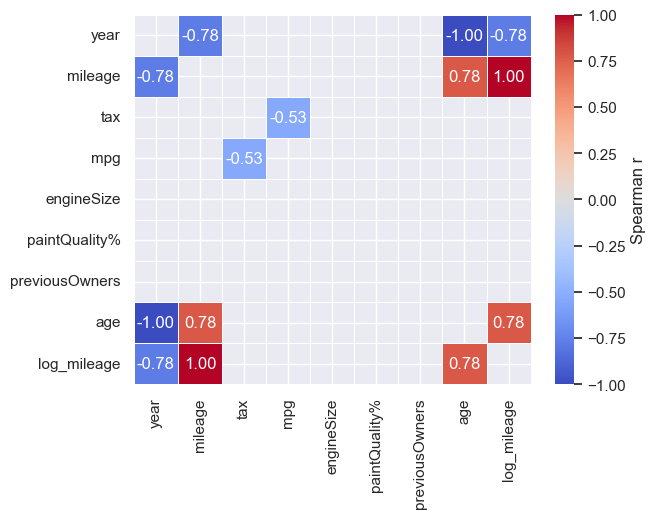

In [56]:
cor_spearman = X_train_num_scaled.corr(method ='spearman')


thr = 0.4
M = cor_spearman            # the EXACT matrix you'll plot (same rows/cols)

mask = M.abs() < thr        # True => hide |r| < 0.4
mask.values[range(len(M)), range(len(M))] = True  # optional: hide diagonal

sns.heatmap(M, mask=mask, vmin=-1, vmax=1, center=0,
            cmap='coolwarm', annot=True, fmt=".2f",
            linewidths=.5, linecolor="white",
            cbar_kws={"label": "Spearman r"})


In [57]:
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [58]:
for var in X_train_cat:
    TestIndependence(X_train_cat[var],y_train, var)


# i will drop transmission
X_train_cat = X_train_cat.drop('transmission', axis = 1)
X_val_cat = X_val_cat.drop('transmission', axis = 1)

Brand is IMPORTANT for Prediction
model is IMPORTANT for Prediction
transmission is NOT an important predictor. (Discard transmission from model)
fuelType is IMPORTANT for Prediction
hasDamage is NOT an important predictor. (Discard hasDamage from model)


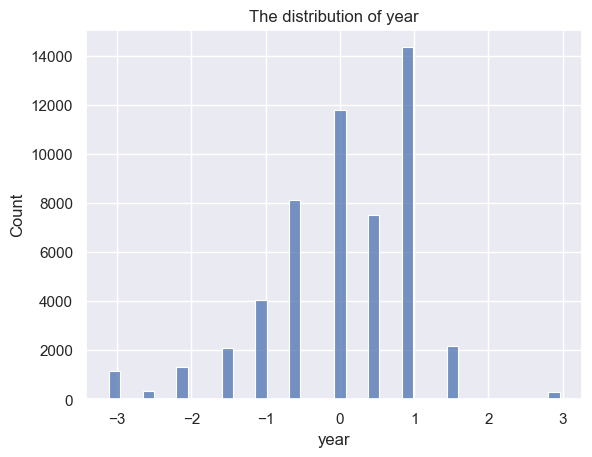

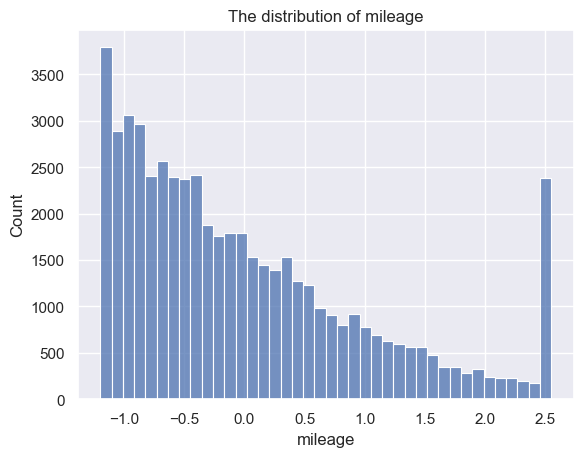

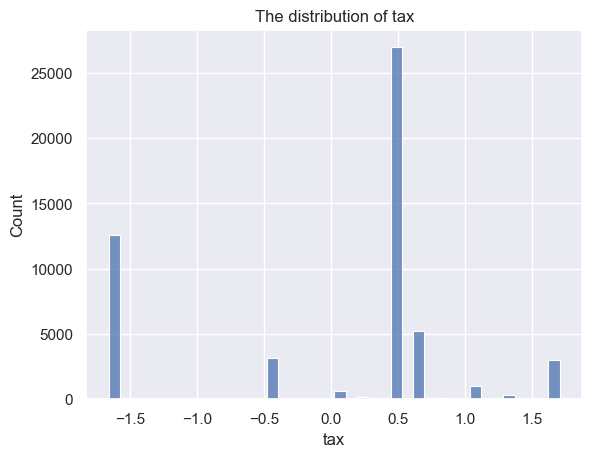

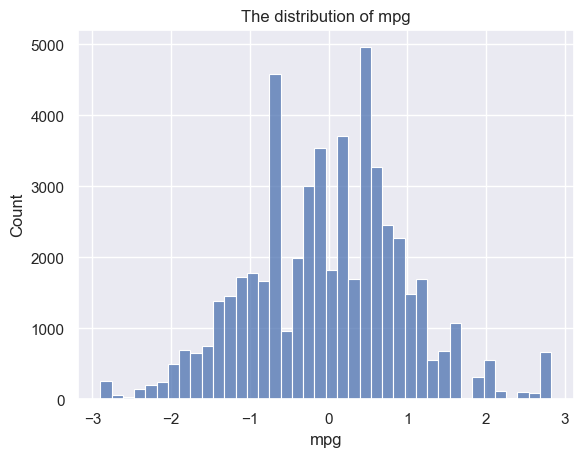

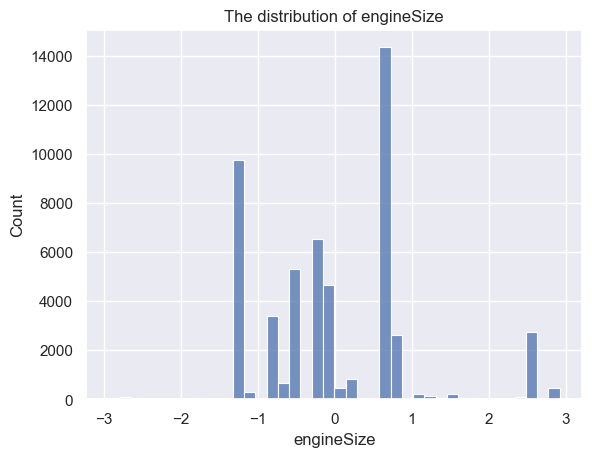

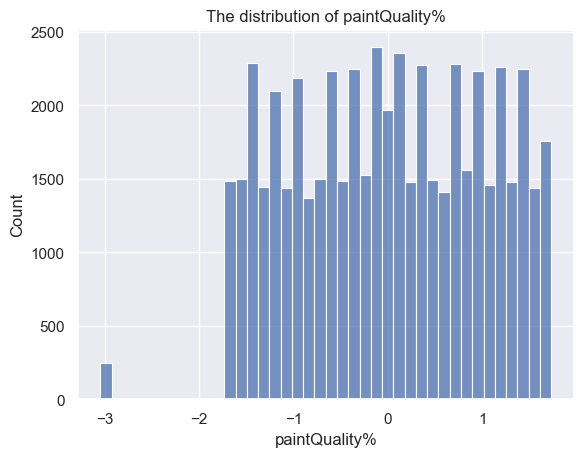

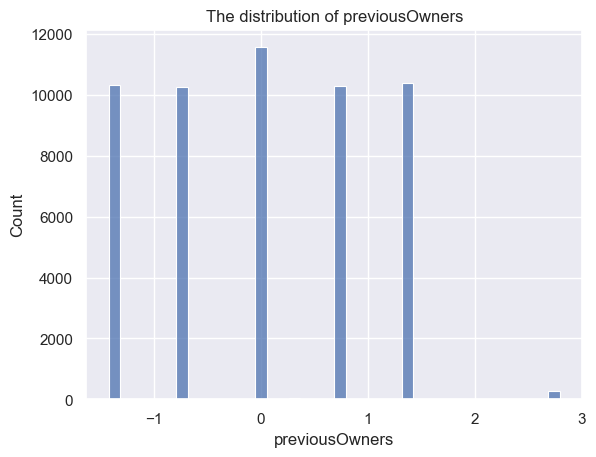

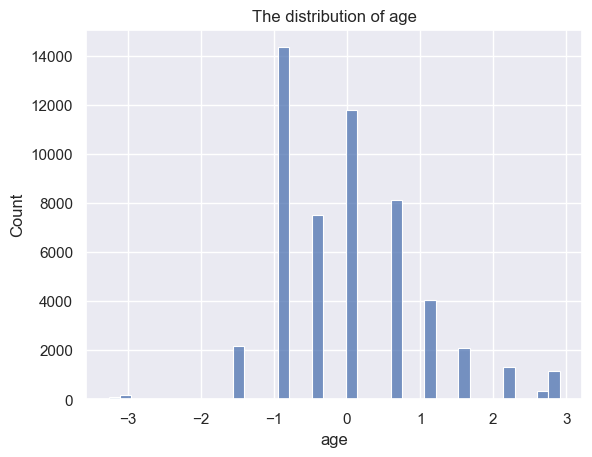

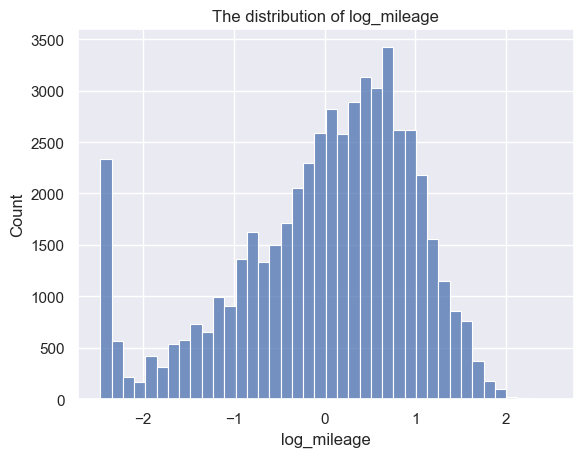

In [59]:
for col in X_train_num.columns:
    sns.histplot(X_train_num_scaled[col], bins = 40)
    plt.title(f'The distribution of {col}')
    plt.show()

In [60]:
#### as we created log mileage and age we have to drop year and mileage

X_train_num_scaled.drop('year', axis = 1, inplace = True)
X_train_num_scaled.drop('mileage', axis = 1, inplace = True)
X_val_num_scaled.drop('year', axis = 1, inplace = True)
X_val_num_scaled.drop('mileage', axis = 1, inplace = True)



In [61]:
### One hot encoding categorical variables to include in the model
one_encoding_train = pd.get_dummies(X_train_cat, drop_first = False, prefix_sep = '=')
one_encoding_val = pd.get_dummies(X_val_cat, drop_first = False, prefix_sep = '=')
one_encoding_val = one_encoding_val.reindex(columns=one_encoding_train.columns, fill_value=0)
X_train_prepared = pd.concat([X_train_num_scaled.reset_index(drop = True),
                         one_encoding_train.reset_index(drop = True)], axis = 1)
X_val_prepared = pd.concat([X_val_num_scaled.reset_index(drop = True),
                         one_encoding_val.reset_index(drop = True)], axis = 1)
X_train_prepared.shape
X_val_prepared.shape

(22780, 254)

### Start modelling ####

In [62]:
from sklearn.model_selection import KFold

cv = KFold(
    n_splits=5, 
    shuffle=True, 
    random_state=42
)

<Axes: xlabel='price', ylabel='Density'>

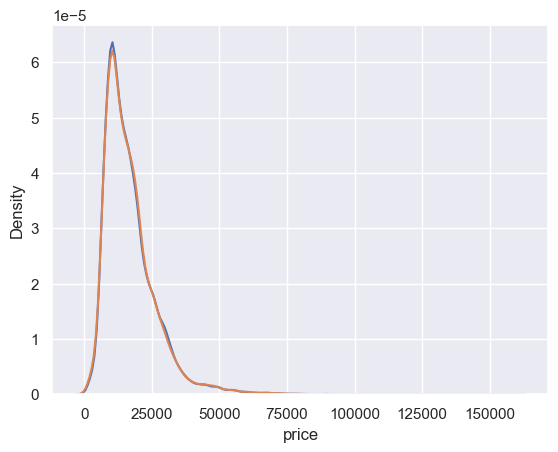

In [63]:
import seaborn as sns
sns.kdeplot(y_train, label='train/val')
sns.kdeplot(y_val, label='test')

In [65]:
from sklearn.linear_model import Lasso

# Create Lasso regression model with alpha=1.0
lasso_model = Lasso(alpha=1.0, max_iter=10000)


# Fit the model
lasso_model.fit(X_train_prepared, y_train)

# Make predictions
y_pred_lasso_train = lasso_model.predict(X_train_prepared)
y_pred_lasso_val = lasso_model.predict(X_val_prepared)

# Evaluate the model
print("Lasso Regression Results:")
print(f"Training R²: {r2_score(y_train, y_pred_lasso_train):.4f}")
print(f"Validation R²: {r2_score(y_val, y_pred_lasso_val):.4f}")
print(f"Training MAE: {mean_absolute_error(y_train, y_pred_lasso_train):.2f}")
print(f"Validation MAE: {mean_absolute_error(y_val, y_pred_lasso_val):.2f}")
print(f"\nIntercept: {lasso_model.intercept_:.2f}")
print("Coefficients:")
for feature, coef in zip(X_train.columns, lasso_model.coef_):
    print(f"  {feature}: {coef:.4f}")

Lasso Regression Results:
Training R²: 0.8371
Validation R²: 0.8418
Training MAE: 2469.46
Validation MAE: 2472.85

Intercept: 15825.49
Coefficients:
  Brand: -649.2542
  model: -1315.9481
  year: 3035.7767
  transmission: -6.9482
  mileage: 2.3379
  fuelType: -2695.5674
  tax: -2479.1930
  mpg: 0.0000
  engineSize: 6878.4363
  paintQuality%: 9040.7826
  previousOwners: -0.0000
  hasDamage: -1339.5360
  age: 5694.8476
  log_mileage: -3128.6266


In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
model = LinearRegression()

In [67]:
#no of features
nof_list=np.arange(1,len(X_train_num_scaled.columns)+1)            
high_score=0
#Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []

for n in range(len(nof_list)):
    model = LinearRegression()
    
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_num_scaled,y_train)
    X_val_rfe = rfe.transform(X_val_num_scaled)
    model.fit(X_train_rfe,y_train)
    
    #storing results on training data
    train_score = model.score(X_train_rfe,y_train)
    train_score_list.append(train_score)
    
    #storing results on validation data
    val_score = model.score(X_val_rfe,y_val)
    val_score_list.append(val_score)
    
    #check best score
    if(val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))
rfe.ranking_

Optimum number of features: 7
Score with 7 features: 0.697126


array([1, 1, 1, 1, 1, 1, 1])

In [68]:
rfe.get_support()

array([ True,  True,  True,  True,  True,  True,  True])

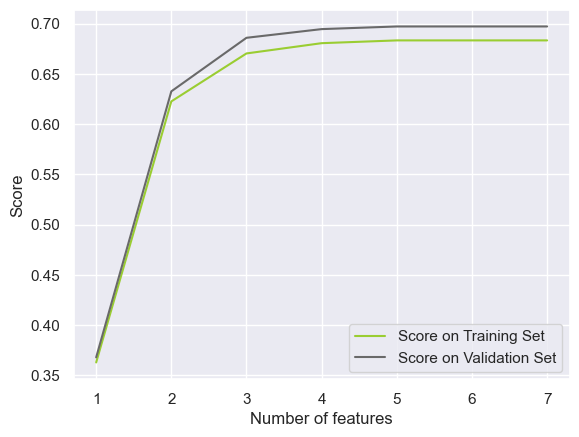

In [69]:
plt.plot(list(range(1,8)), train_score_list, label="Score on Training Set", color='yellowgreen')
plt.plot(list(range(1,8)), val_score_list, label="Score on Validation Set", color='dimgray')
plt.xlabel("Number of features")
plt.ylabel("Score")
plt.legend()
plt.show()

In [70]:
reg = LassoCV()

reg.fit(X_train_num_scaled, y_train)
coef = pd.Series(reg.coef_, index = X_train_num_scaled.columns)
coef

tax               -616.642824
mpg              -1369.627712
engineSize        5802.743566
paintQuality%      -16.945164
previousOwners      -0.000000
age              -3058.647997
log_mileage      -2638.310880
dtype: float64

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error

# Create Elastic Net model with alpha=1.0 and l1_ratio=0.5 (equal mix of L1 and L2)
elastic_model = ElasticNet(alpha=1.0, l1_ratio=0.5, max_iter=10000)

# Fit the model
elastic_model.fit(X_train_prepared, y_train)

# Make predictions
y_pred_elastic_train = elastic_model.predict(X_train_prepared)
y_pred_elastic_val = elastic_model.predict(X_val_prepared)

# Evaluate the model
print("Elastic Net Regression Results:")
print(f"Training R²: {r2_score(y_train, y_pred_elastic_train):.4f}")
print(f"Validation R²: {r2_score(y_val, y_pred_elastic_val):.4f}")
print(f"Training MAE: {mean_absolute_error(y_train, y_pred_elastic_train):.2f}")
print(f"Validation MAE: {mean_absolute_error(y_val, y_pred_elastic_val):.2f}")
print(f"\nIntercept: {elastic_model.intercept_:.2f}")
print("Coefficients:")
for feature, coef in zip(X_train_prepared.columns, elastic_model.coef_):
    print(f"  {feature}: {coef:.4f}")
    
# Count how many features were selected (non-zero coefficients)
n_features_selected = sum(elastic_model.coef_ != 0)
print(f"\nFeatures selected: {n_features_selected} out of {len(elastic_model.coef_)}")

#### Results

In [71]:
#According to RFE 

# 4. Test <a class="anchor" id="4-test"></a>

In [72]:

test = pd.read_csv('test.csv')

### Clean the brand in test

In [73]:
test["Brand"] = clean_categorical(test["Brand"],brand_mapping)

In [74]:
test = match_car_models_df(
    test,
    model_column='model',
    brand_column='Brand',
    model_to_brand=model_to_brand,
    misspelling_corrections=misspelling_model_corrections,
    unknown_models=unknown_models
)

Debug: Unmatched models after cleaning: {'karoq', 'hilux', 'kona', 'cls class', 'i30', 's3', 'a8', 'focus', 'rs6', 's class', 'agila', 'kuga', 'rs5', '5 series', 'passat', 'ka', 'i800', 'a7', 'prius', 'cc', 'v class', 'glc class', 'aygo', 'grand c-max', 'c class', 'a3', 'amarok', 'i4', 'crossland x', 'q7', 'rs4', 'sl class', 'yeti outdoor', 'verso', 'z4', 'pum', 'gla class', 's4', 'q3', 'california', 'grand tourneo connect', 'kamiq', 'g clas', 'santa fe', 'corolla', 'b-max', 'tiguan allspace', 'caddy', 'm class', 'californi', 'c-h', '7 series', 'x5', 'cl class', 'edge', 'auris', 'ix35', 'superb', 'x3', 'caravelle', 'fiesta', '3 series', '6 series', 'terracan', 'sq7', 'tourneo connect', 'camry', 'golf sv', 'sq5', 'veloster', 'supra', 'm5', 'crossland', 'touareg', 'rs7', 'i3', 'ka+', 'r8', 'mokka', 'a1', 'i20', 'insignia', 'jetta', 'gtc', 'avensis', 'fox', 'mokka x', 'iq', 'eos', 'caddy maxi life', 'arteon', 'zafira tourer', 't-cross', 'ampera', 'm4', 'citigo', 'x4', 'x7', 'tigra', 'cla 

In [75]:
test['model'].nunique()

224

In [76]:
test = clean_vehicle_dataframe(test)

In [77]:
test.head()

,carID,Brand,model,brand_match,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,89856,Hyundai,I30,1.0,2023.0,Automatic,30700.0,Petrol,205.0,41.5,1.6,61.0,3.0,0.0
1,106581,Volkswagen,tiguan,1.0,2017.0,Semi-Auto,48191.0,Petrol,150.0,38.2,2.0,60.0,2.0,0.0
2,80886,BMW,2 Series,1.0,2016.0,Automatic,36792.0,Petrol,125.0,51.4,1.5,94.0,2.0,0.0
3,100174,Opel,Grandland X,1.0,2019.0,Manual,5533.0,Petrol,145.0,44.1,1.2,77.0,1.0,0.0
4,81376,BMW,1 Series,1.0,2019.0,Semi-Auto,9058.0,Diesel,150.0,51.4,2.0,45.0,4.0,0.0


In [78]:
clean_max_paintquality = test['paintQuality%'] > 100
test.loc[clean_max_paintquality, 'paintQuality%'] = 100

In [79]:
clean_fueltype = test['fuelType'] == 'Other'
test.loc[clean_fueltype, 'fuelType'] = np.nan

In [80]:
clean_engine_size = test['engineSize'] == 0
test.loc[clean_engine_size, 'engineSize'] = np.nan

test['hasDamage'] = test['hasDamage'].fillna(1)


In [81]:
test['transmission'].unique()
test.describe()

,carID,brand_match,year,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
count,32567.000000,32567.000000,31914.000000,31878.000000,29259.000000,29279.000000,31846.000000,31942.000000,31970.000000,32567.000000
mean,92256.000000,0.977001,2017.102244,23453.888889,121.084624,55.261034,1.670423,64.313381,2.027557,0.018331
std,9401.427445,0.149902,2.205807,21600.874789,64.597275,17.486063,0.567333,20.837548,1.434448,0.134149
min,75973.000000,0.000000,1991.000000,1.000000,0.000000,0.300000,0.100000,2.000000,0.000000,0.000000
25%,84114.500000,1.000000,2016.000000,7500.000000,125.000000,46.300000,1.200000,47.000000,1.000000,0.000000
50%,92256.000000,1.000000,2017.000000,17500.000000,145.000000,54.300000,1.600000,65.000000,2.000000,0.000000
75%,100397.500000,1.000000,2019.000000,32974.750000,145.000000,62.800000,2.000000,82.000000,3.000000,0.000000
max,108539.000000,1.000000,2024.000000,279000.000000,580.000000,470.800000,6.600000,100.000000,6.000000,1.000000


In [82]:
test['age'] = ref_year - test['year']
test['log_mileage'] = np.log(test['mileage'])


In [83]:
test.isna().sum()

carID                0
Brand               17
model              650
brand_match          0
year               653
transmission       623
mileage            689
fuelType           738
tax               3308
mpg               3288
engineSize         721
paintQuality%      625
previousOwners     597
hasDamage            0
age                653
log_mileage        689
dtype: int64